# Exploration of the PhysioNet2021 Data

This notebook is about the PyTorch implementation of the model placing 2nd out of 41 teams in the PhysioNet/Computing in Cardiology Challenge 2020. The model was created by the team called 'Between a ROC and a heart place'.  More information about the model can be found from the related paper which was accepted by the CinC2020 and titled [Analysis of an adaptive lead weighted ResNet for multiclass classification of 12-lead ECGs](https://iopscience.iop.org/article/10.1088/1361-6579/ac5b4a/pdf). The repository of the model is available [here](https://github.com/ZhaoZhibin/Physionet2020model).

*NB! From now on, all references to "the team" means the team Between a ROC and a heart place!*

The main objective in this notebook is to study this data and make a detailed description of it.

-----

*All the information gathered here comes from the sources listed in the text.*

## George B. Moody PhysioNet Challenge 2021


### Will Two Do? Varying Dimensions in Electrocardiography: The PhysioNet/Computing in Cardiology Challenge 2021

The goal of the 2021 Challenge was to identify clinical diagnoses from twelve-lead, six-lead (I, II, III, aVR, aVL, aVF), four-lead (I, II, III, V2), three-lead (I, II, V2), and two-lead (I and II) ECG recordings. The task was to design and implement a working, open-source algorithm that can, based only on the clinical data provided, automatically identify the cardiac abnormality or abnormalities present in the recording. The data were annotated with 133 diagnoses from which 30 were used to evaluate algorithms. The 30 diagnoses were selected by the cardiologists of the challenge since they were relatively prevalent and electrophysiological and therefore able to be accurately diagnosed using only ECG recordings.

More information about the challenge is available in their website https://moody-challenge.physionet.org/2021/
and in the papers [Will Two Do? Varying Dimensions in Electrocardiography: The PhysioNet/Computing in Cardiology Challenge 2021](https://moody-challenge.physionet.org/2021/papers/2021ChallengePaperCinC.pdf) and [Issues in the automated classification of multilead ECGs using heterogeneous labels and populations](https://moody-challenge.physionet.org/2021/papers/2021ChallengePaperPMEA.pdf).

All data was provided in WFDB format. Each ECG recording consist of a binary `MATLAB v4 file` (.mat) for the ECG signal data and a text file in `WFDB header format` (.hea) describing the recording and patient attributes, including diagnosis. 

> ```
MAT-file of version 4 is supported by all MATLAB releases and it supports two-dimensional double, characted and sparse arrays as features. Compression is not supported and the maximum size of each variable is 100 000 000 elements per array and 2^31 bytes per variable.
> ```
> &emsp; &emsp; ([MathWorks](https://se.mathworks.com/help/matlab/import_export/mat-file-versions.html)) 
> ```
> For each database record, a WFDB header file specifies the names of the associated signal files and their attributes. Header files contain line- and field-oriented ASCII text. ASCII linefeed characters separate lines (which may not contain more than 255 characters each, including the linefeed), and spaces or tabs separate fields (except as noted below). Header files contain at a minimum a record line, which specifies the record name, the number of segments, and the number of signals. Comment lines may appear anywhere in a header file. The first printing character in a comment line must be ‘#’.
>```
> &emsp; &emsp; ([Physionet](https://www.physionet.org/physiotools/wag/header-5.htm))

Below is an example header file A0001.hea:

```
A0001 12 500 7500 05-Feb-2020 11:39:16
A0001.mat 16+24 1000/mV 16 0 28 -1716 0 I
A0001.mat 16+24 1000/mV 16 0 7 2029 0 II
A0001.mat 16+24 1000/mV 16 0 -21 3745 0 III
A0001.mat 16+24 1000/mV 16 0 -17 3680 0 aVR
A0001.mat 16+24 1000/mV 16 0 24 -2664 0 aVL
A0001.mat 16+24 1000/mV 16 0 -7 -1499 0 aVF
A0001.mat 16+24 1000/mV 16 0 -290 390 0 V1
A0001.mat 16+24 1000/mV 16 0 -204 157 0 V2
A0001.mat 16+24 1000/mV 16 0 -96 -2555 0 V3
A0001.mat 16+24 1000/mV 16 0 -112 49 0 V4
A0001.mat 16+24 1000/mV 16 0 -596 -321 0 V5
A0001.mat 16+24 1000/mV 16 0 -16 -3112 0 V6
#Age: 74
#Sex: Male
#Dx: 426783006
#Rx: Unknown
#Hx: Unknown
#Sx: Unknown
```

First line consists of a recording number (A0001), the lead number (12), sample frequency (at 500Hz) and number of samples (7500). The lead number and sample frequency are the same for all recordings. 

Next 12 lines descripe the signal format (16 bits with an offset of 24 bits), the amptitude resolution (1000 with units in mV), the resolution of the analog-to-digital converter (*ADC*) used to digitalize the signal (16 bits), and the baseline value corresponding to 0 physical units (0). The first value of the signal, the checksum, and the lead name are included for each signal.

The last six lines are for the patient information such as age (74), sex (Male) and diagnosis (426783006). The medical prescription (Rx), history (Hx), and symptom or surgery (Sx) are unknown.

The data used in the challenge were from multiple sources:

**CPSC Database and CPSC-Extra Database**
* Together, these databases contain 13,256 ECGs (10,330 ECGs shared as training data, 1,463 retained as validation data, and 1,463 retained as test data). An unused dataset from CPSC 2018 was shared as the training set, and the test set from CPSC 2018 dataset was split into validation and test sets.

**INCART Database**
- The source contains 74 annotated ECGs (all shared as training data) extracted from 32 Holter monitor recordings. 

**PTB and PTB-XL Database**

- This source is from the Physikalisch Technische Bundesanstalt (PTB) which comprises two public databases: the PTB Diagnostic ECG Database and the PTB-XL, a large publicly available electrocardiography dataset (all shared as training data). The first PTB database contains 516 records (male: 377, female: 139). The PTB-XL contains 21,837 clinical 12-lead ECGs (male: 11,379 and female: 10,458).

**The Georgia 12-lead ECG Challenge (G12EC) Database**
- A Georgia database represents a unique demographic of the Southeastern United States. This source contains 20,672 ECGs (10,344 ECGs shared as training data, 5,167 retained as validation data, and 5,161 retained as test data). 

**Undisclosed**
- This database contains 10,000 recordings (all retained as test data) from an undisclosed American institution that is geographically distinct from the other sources.

**Chapman-Shaoxing and Ningbo Database**
- This source is the Chapman University, Shaoxing People’s Hospital (Chapman-Shaoxing) and Ningbo First Hospital (Ningbo) database. It source contains 40,258 ECGS (all shared as training data). Each recording is 10 seconds long with a sampling frequency of 500 Hz.

**The University of Michigan (UMich) Database**
- The seventh source is UMich Database from the University of Michigan. This source contains 19,642 ECGs (all retained as test data). Each recording is 10 seconds long with a sampling frequency of either 250 Hz or 500 Hz.

So the total number of recordings in the training set was 88 253 which was sourced from seven databases. The validation set included 6 630 recordings from two databases and the testing set included 36 266 recordings from four datasets, including two sources that were not represented in the training or validation set.

------

# Physionet2021 data
## Loading the data

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import re
 
### Some of the helper functions ###
def load_challenge_data(header_file):
    '''
        Loading the ECG recording data
    param: 
        str():header_file - headerfile name (e.g. A0001.hea)
    returns:
        np.array():recording - converted .mat into an array
        list(): header - all lines from .hea file
    '''
    with open(header_file, 'r') as f:
        header = f.readlines()
    mat_file = header_file.replace('.hea', '.mat')
    x = loadmat(mat_file)
    recording = np.asarray(x['val'], dtype=np.float64)
    return recording, header

def get_information(filenames):
    '''
        Extracting the patient information
    param: 
        str():filenames - header files (.hea)
    returns:
        pd.dataFrame():pandas DataFrame of patient data
    '''
    result_df = pd.DataFrame()
    for filename in filenames:
        with open(filename, 'r') as f:
            f_name = re.search(r'\w*.\d\w.hea', filename).group()
            dxs = []; age = ""; gender = ""; rx = ""; hx = "Unknown"; sx = "Unknown"
            for line in f:
                
                # Get information needed
                if line.startswith('#Dx'):
                    dxs = line.split(': ')[1].split(',')
                    dxs = [dx.strip() for dx in dxs]
                if line.startswith('#Age'):
                    age = line.split(': ')[1].strip()
                if line.startswith('#Sex'):
                    gender = line.split(': ')[1].strip() 
                if line.startswith('#Rx'):
                    rx = line.split(': ')[1].strip()
                if line.startswith('#Hx'):
                    hx = line.split(': ')[1].strip()
                if line.startswith('#Sx'):
                    sx = line.split(': ')[1].strip()

            # Gathering the patient information into dictionary for dataframe
            info = pd.DataFrame({'Age': age,
                    'Gender': gender,
                    'Diagnosis': [dxs],
                    'Prescription': rx,
                    'History': hx,
                    'Symptom or surgery': sx,
                    'file': f_name})
            result_df = pd.concat([result_df, info], ignore_index=True, axis=0)
    
    return result_df

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
# Loading the data
import os, random, glob

input_dir = '../data/physionet_data/'
header_files = [] # paths of the header files

#for f in os.listdir(input_dir):
#    g = os.path.join(input_dir, f)
#    if not f.lower().startswith('.') and f.lower().endswith('hea') and os.path.isfile(g):
#       header_files.append(g)

for root, dirs, files in os.walk(input_dir):
    print(f"Opening the root {root}...")
    for file in sorted(files):
        if not file.lower().startswith('.') and file.lower().endswith('hea'):
            g = os.path.join(root, file)
            header_files.append(g)
            
print()
print("Found for example")
print(*header_files[0:5], sep="\n")

Opening the root ../data/physionet_data/...
Opening the root ../data/physionet_data/.ipynb_checkpoints...
Opening the root ../data/physionet_data/WFDB_PTB...
Opening the root ../data/physionet_data/WFDB_CPSC2018_2...
Opening the root ../data/physionet_data/WFDB_CPSC2018...
Opening the root ../data/physionet_data/WFDB_Ga...
Opening the root ../data/physionet_data/WFDB_ChapmanShaoxing...
Opening the root ../data/physionet_data/WFDB_StPetersburg...
Opening the root ../data/physionet_data/WFDB_PTBXL...
Opening the root ../data/physionet_data/WFDB_Ningbo...

Found for example
../data/physionet_data/WFDB_PTB/S0001.hea
../data/physionet_data/WFDB_PTB/S0002.hea
../data/physionet_data/WFDB_PTB/S0003.hea
../data/physionet_data/WFDB_PTB/S0004.hea
../data/physionet_data/WFDB_PTB/S0005.hea


------------
## Patient statistics

Let's first look at the data from patients. The statistics about them can be extracted from the header files.

NB! Since usually the medical records are highly secured, no major discoveries are expected in this case. However, at least *age* and *gender* are recorded from most patients, and since the main object for the challenge was to identify clinical diagnosis from ECG recordings, their *diagnoses* are available too.

In [3]:
# Getting the patient information into the dataframe
df = get_information(header_files)
print(f"The length of the data frame: {len(df)}")
print()
print("Descriptive information about the dataframe:")
display(df.info())
print("The 10 first rows:")
#df.sort_values(by=['file'], inplace = True, ignore_index=True) # Sorting and reindexing the dataFrame
display(df.head(10))

The length of the data frame: 88253

Descriptive information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88253 entries, 0 to 88252
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 88253 non-null  object
 1   Gender              88253 non-null  object
 2   Diagnosis           88253 non-null  object
 3   Prescription        88253 non-null  object
 4   History             88253 non-null  object
 5   Symptom or surgery  88253 non-null  object
 6   file                88253 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


None

The 10 first rows:


,Age,Gender,Diagnosis,Prescription,History,Symptom or surgery,file
0,81,Female,[164865005],Unknown,Unknown,Unknown,S0001.hea
1,81,Female,[164865005],Unknown,Unknown,Unknown,S0002.hea
2,81,Female,[164865005],Unknown,Unknown,Unknown,S0003.hea
3,58,Female,[164865005],Unknown,Unknown,Unknown,S0004.hea
4,63,Male,[164865005],Unknown,Unknown,Unknown,S0005.hea
5,69,Male,[164865005],Unknown,Unknown,Unknown,S0006.hea
6,69,Male,[164865005],Unknown,Unknown,Unknown,S0007.hea
7,74,Male,[164865005],Unknown,Unknown,Unknown,S0008.hea
8,74,Male,[164865005],Unknown,Unknown,Unknown,S0009.hea
9,74,Male,[164865005],Unknown,Unknown,Unknown,S0010.hea


In [4]:
# Let's have a backup so no need to load everything everytime when messing up with the original one......
df_backup = df.copy()

In [5]:
### Cleaning up the dataframe ###
# Since its seems that most of the values in History, Prescription and Symptom or surgery
# columns are 'Unknown', let's check if they all are
print("All 'History' column values are 'Unknown':", df['History'].eq(df['History'].iloc[0]).all())
print("All 'Prescription' column values are 'Unknown':", df['Prescription'].eq(df['Prescription'].iloc[0]).all())
print("All 'Symptom or surgery' column values are 'Unknown':", df['Symptom or surgery'].eq(df['Symptom or surgery'].iloc[0]).all())

# Next the Age column - we want the age be numeric
print("== AGE ==")
print(f"The dtype before conversion: {df['Age'].dtype}")
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') # errors: If ‘coerce’, then invalid parsing will be set as NaN.
print(f"The dtype after conversion: {df['Age'].dtype}")
print(f"There are {df['Age'].isna().sum()} NaN values in the column")
print("-"*50)

# Then the Gender column: see if we have only females and males (note the first letter)
print("== GENDER ==")
print("Unique values before replacement:\n", df['Gender'].unique())
# So let's convert all gender values to be either 'female' or 'male' or NaN
mask_f = (df['Gender'] == "Female") | (df['Gender'] == "F") | (df['Gender'] == "f")
mask_m = (df['Gender'] == "Male") | (df['Gender'] == "M") | (df['Gender'] == "m")
mask_u = (df['Gender'] == "Unknown") | (df['Gender'] == "NaN")
df['Gender'] = np.where(mask_f, 'female', df['Gender'])
df['Gender'] = np.where(mask_m, 'male', df['Gender'])
df['Gender'] = np.where(mask_u, 'Unknown', df['Gender'])
print("Unique values after replacement:\n", df['Gender'].unique())
print(f"There are {df['Gender'].isna().sum()} NaN values in the column")

display(df.head(5))
# Now we should have a cleaned dataframe with some NaN values

All 'History' column values are 'Unknown': True
All 'Prescription' column values are 'Unknown': True
All 'Symptom or surgery' column values are 'Unknown': True
== AGE ==
The dtype before conversion: object
The dtype after conversion: float64
There are 236 NaN values in the column
--------------------------------------------------
== GENDER ==
Unique values before replacement:
 ['Female' 'Male' 'NaN' 'Unknown']
Unique values after replacement:
 ['female' 'male' 'NaN']
There are 0 NaN values in the column


,Age,Gender,Diagnosis,Prescription,History,Symptom or surgery,file
0,81.0,female,[164865005],Unknown,Unknown,Unknown,S0001.hea
1,81.0,female,[164865005],Unknown,Unknown,Unknown,S0002.hea
2,81.0,female,[164865005],Unknown,Unknown,Unknown,S0003.hea
3,58.0,female,[164865005],Unknown,Unknown,Unknown,S0004.hea
4,63.0,male,[164865005],Unknown,Unknown,Unknown,S0005.hea


In [6]:
# Lastly
# As the checkups about History, Prescription and Symptom or surgery columns are all True, 
# let's delete these columns since they don't give any value for exploration
df = df.drop(['History', 'Prescription', 'Symptom or surgery' ], axis=1)
display(df.head(5))
print("-"*50)

,Age,Gender,Diagnosis,file
0,81.0,female,[164865005],S0001.hea
1,81.0,female,[164865005],S0002.hea
2,81.0,female,[164865005],S0003.hea
3,58.0,female,[164865005],S0004.hea
4,63.0,male,[164865005],S0005.hea


--------------------------------------------------


To pre-process the age variable, the team scaled it into the range [0,1] and for the gender variable they used one-hot-encoding. Two additional mask variables represented missing values for age and gender. 

### The ResNet model and cardiac conditions (by Between a ROC and a heart place in the Physionet2020)

The model created by the team classifies 24 cardiac conditions out of the total of 27 diagnoses of special interest in the challenge. Each class of these 24 diagnoses corresponds to a single ICD-10 code with the expections of classes 'PVC' (*Premature Ventricular Contraction*), 'PAC' (*Premature Atrial Contraction*), and 'RBBB' (*Right Bundle Branch Block*). These classes the team considered to correspond to two identical clinical codes.

In the challenge, in the evaluating phase, the challenge considered three pairs of diagnoses as the same diagnosis:
* Complete right bundle branch block (713427006) and right bundle branch block (59118001)
* Premature atrial contraction (284470004) and supraventricular premature beats (63593006)
* Premature ventricular contractions (427172004) and ventricular premature beats (17338001)

The following mapping shows how the total number of each diagnosis in each data set. The diagnoses are the one which were evaluated in the challenge 2020.

In [7]:
# The diagnosis mapping scored in 2020
map_path = "https://raw.githubusercontent.com/physionetchallenges/evaluation-2020/master/dx_mapping_scored.csv"
scored_labels2020 = pd.read_csv(map_path, delimiter=",")
display(scored_labels2020)

,Dx,SNOMED CT Code,Abbreviation,CPSC,CPSC-Extra,StPetersburg,PTB,PTB-XL,Georgia,Total,Notes
0,1st degree av block,270492004,IAVB,722,106,0,0,797,769,2394,NaN
1,atrial fibrillation,164889003,AF,1221,153,2,15,1514,570,3475,NaN
2,atrial flutter,164890007,AFL,0,54,0,1,73,186,314,NaN
3,bradycardia,426627000,Brady,0,271,11,0,0,6,288,NaN
4,complete right bundle branch block,713427006,CRBBB,0,113,0,0,542,28,683,We score 713427006 and 59118001 as the same di...
5,incomplete right bundle branch block,713426002,IRBBB,0,86,0,0,1118,407,1611,NaN
6,left anterior fascicular block,445118002,LAnFB,0,0,0,0,1626,180,1806,NaN
7,left axis deviation,39732003,LAD,0,0,0,0,5146,940,6086,NaN
8,left bundle branch block,164909002,LBBB,236,38,0,0,536,231,1041,NaN
9,low qrs voltages,251146004,LQRSV,0,0,0,0,182,374,556,NaN


As can be seen from the mapping the challenge provided, the total count of the diagnoses is 60 374 in the training dataset. The instances of the given datasets can be separated from each other by the letter(s) of the file name as follows:

**The model used (2020 challenge training set):**
* CPSC: **A**0001, A0002, A0003,...
* CPSC-Extra: **Q**0001, Q0002, Q0003,...
* INCART: **I**0001, I0002, I0003,...
* PTB: **S**0001, S0002, S0003,...
* PTB-XL: **HR**00001, HR00002, HR00003,...
* G12EC: **E**00001, E00002, E00003,...

**2021 challenge also used:**
* Chapman-Shaoxing: **JS**00001, JS00002, JS00003,...
* Ningbo: **JS**10647, JS10648, JS10649...
    * *NB!* These two sources use the same letters in the beginning but they can be identified based on the number in the file name (Chapman-Shaoxing 1-10646, Ningbo 10647-)

In the dataframe created above, the file column contains the file name so it's quite easy to split the data by its source.

In [8]:
# Let's cut the dataframe into pieces based on its source for the future exploration
# Exploring the different sources of data sets
file_separators = "A-Q I S-HR E JS".split(" ")
sources = "CPSC-&-CPSC-Extra INCART PTB-&-PTB-XL G12EC Chapman-Shaoxing-&-Ningbo".split(" ")
sources_and_seps = tuple(zip(sources, file_separators)) # ("CPSC", "A")

# List of all source dataframes
source_dfs = []
for source, separator in sources_and_seps:
    if len(separator) > 2:
        separators = separator.split("-")
        
        df_temp = pd.DataFrame()
        for sep in separators:
            df_temp2 = df[df['file'].str.contains(r"^%s" % sep)]
            df_temp = pd.concat([df_temp, df_temp2], ignore_index = True)
    
    else:
        df_temp = df[df['file'].str.contains(r"^%s" % separator)]
        
    source_dfs.append(df_temp)

print(f"So now we have {len(source_dfs)} dataframes from {len(sources)} different sources")
print("Let's have a peek at a few")
display(source_dfs[0].head(5))
display(source_dfs[1].head(5))

So now we have 5 dataframes from 5 different sources
Let's have a peek at a few


,Age,Gender,Diagnosis,file
0,74.0,male,[59118001],A0001.hea
1,49.0,female,[426783006],A0002.hea
2,81.0,female,[164889003],A0003.hea
3,45.0,male,[164889003],A0004.hea
4,53.0,male,[164884008],A0005.hea


,Age,Gender,Diagnosis,file
31437,65.0,female,"[53741008, 164884008]",I0001.hea
31438,65.0,female,"[53741008, 251180001, 251182009]",I0002.hea
31439,59.0,male,"[164931005, 164884008, 57054005]",I0003.hea
31440,59.0,male,"[74615001, 164884008, 251182009, 425856008, 57...",I0004.hea
31441,59.0,male,"[425856008, 57054005]",I0005.hea


#### So let's dig into the details for each source separately!

CPSC and CPSC-Extra Database (sep: A-Q)
Total of 10330 recordings


,Age,Gender,Diagnosis,file
0,74.0,male,[59118001],A0001.hea
1,49.0,female,[426783006],A0002.hea
2,81.0,female,[164889003],A0003.hea
3,45.0,male,[164889003],A0004.hea
4,53.0,male,[164884008],A0005.hea


Descriptive information about the Age column:


count    10324.000000
mean        61.362456
std         18.034221
min         -1.000000
25%         51.000000
50%         64.000000
75%         75.000000
max        104.000000
Name: Age, dtype: float64

So the youngest patient is -1 and the oldest 104 years old


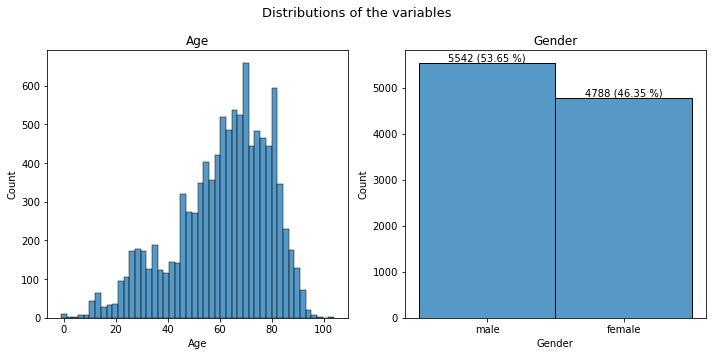

Total number of diagnoses mentioned is 13417 out of 73 individual diagnosis
The number of diagnoses a patient has varies from 1 to 7
Out of 73 individual diagnoses, 50 diagnoses are not used in the classification
leaving 23 diagnosis for the task


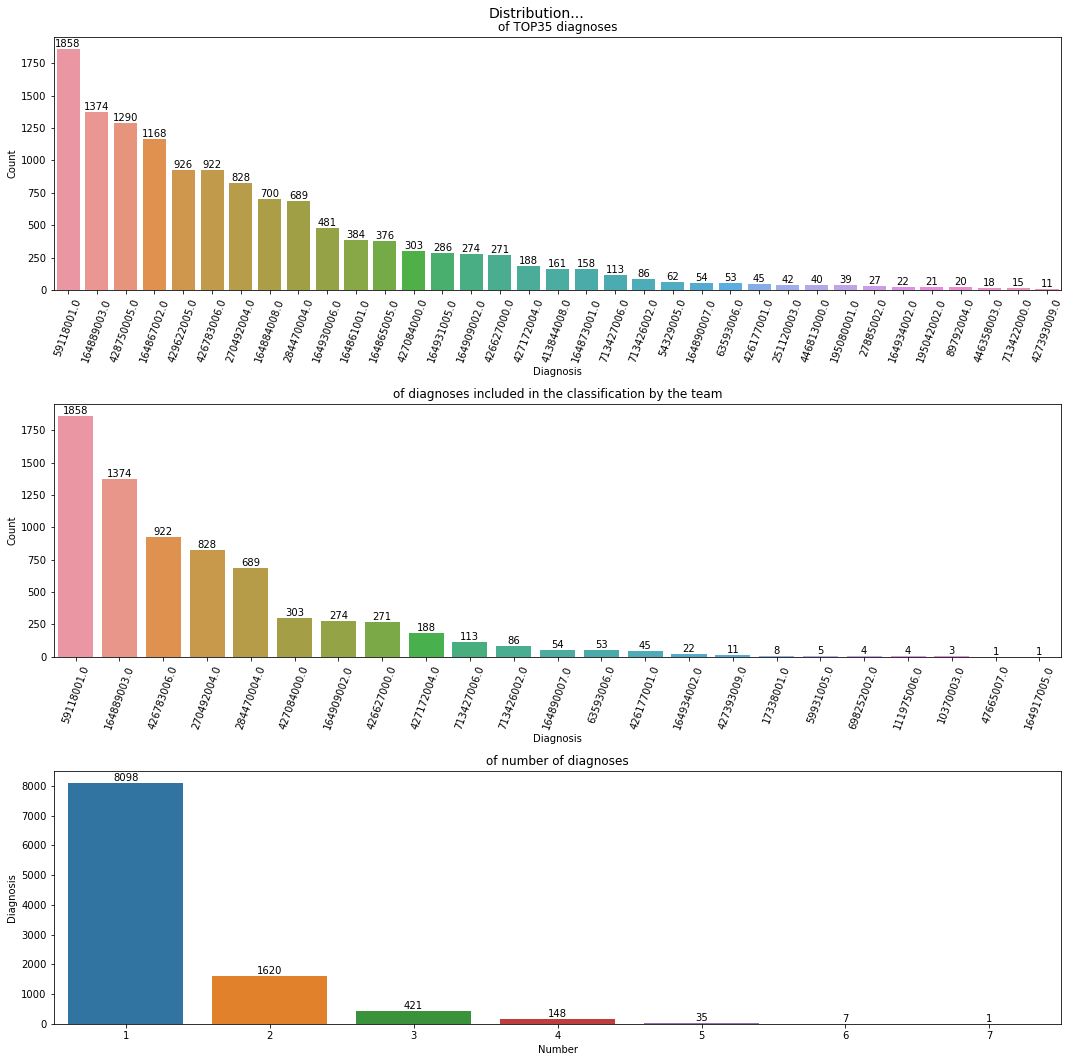

TOP5 diagnoses based on number out of all diagnoses:
59118001.0, 164889003.0, 428750005.0, 164867002.0, 429622005.0
TOP5 diagnoses based on number out of included diagnoses:
59118001.0, 164889003.0, 426783006.0, 270492004.0, 284470004.0

INCART Database (sep: I)
Total of 74 recordings


,Age,Gender,Diagnosis,file
31437,65.0,female,"[53741008, 164884008]",I0001.hea
31438,65.0,female,"[53741008, 251180001, 251182009]",I0002.hea
31439,59.0,male,"[164931005, 164884008, 57054005]",I0003.hea
31440,59.0,male,"[74615001, 164884008, 251182009, 425856008, 57...",I0004.hea
31441,59.0,male,"[425856008, 57054005]",I0005.hea


Descriptive information about the Age column:


count    74.000000
mean     55.986486
std      13.884547
min      18.000000
25%      49.000000
50%      59.000000
75%      66.000000
max      80.000000
Name: Age, dtype: float64

So the youngest patient is 18 and the oldest 80 years old


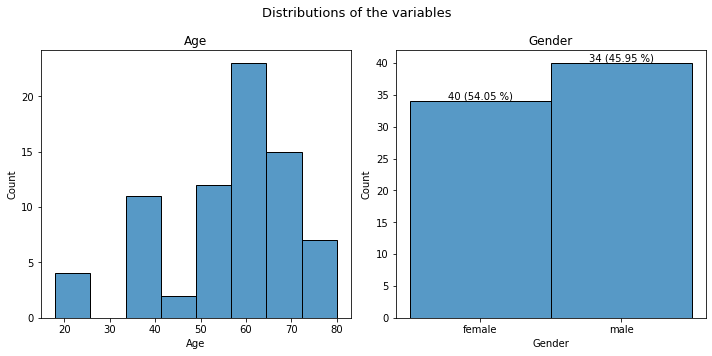

Total number of diagnoses mentioned is 229 out of 37 individual diagnosis
The number of diagnoses a patient has varies from 1 to 8
Out of 37 individual diagnoses, 28 diagnoses are not used in the classification
leaving 9 diagnosis for the task


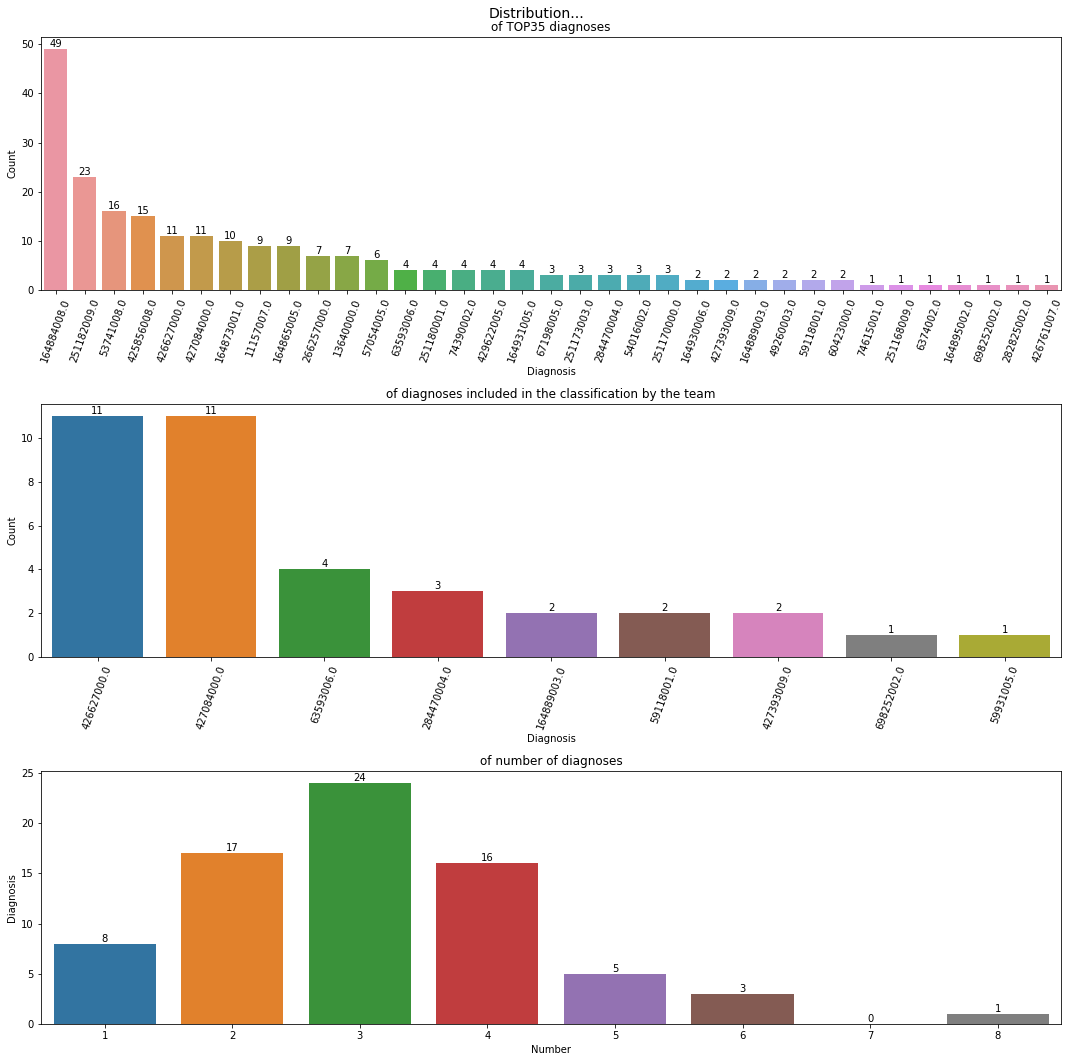

TOP5 diagnoses based on number out of all diagnoses:
164884008.0, 251182009.0, 53741008.0, 425856008.0, 426627000.0
TOP5 diagnoses based on number out of included diagnoses:
426627000.0, 427084000.0, 63593006.0, 284470004.0, 164889003.0

PTB and PTB-XL Database (sep: S-HR)
Total of 22353 recordings


,Age,Gender,Diagnosis,file
0,81.0,female,[164865005],S0001.hea
1,81.0,female,[164865005],S0002.hea
2,81.0,female,[164865005],S0003.hea
3,58.0,female,[164865005],S0004.hea
4,63.0,male,[164865005],S0005.hea


Descriptive information about the Age column:


count    22255.000000
mean        59.755605
std         16.899219
min          2.000000
25%         50.000000
50%         62.000000
75%         72.000000
max         95.000000
Name: Age, dtype: float64

So the youngest patient is 2 and the oldest 95 years old


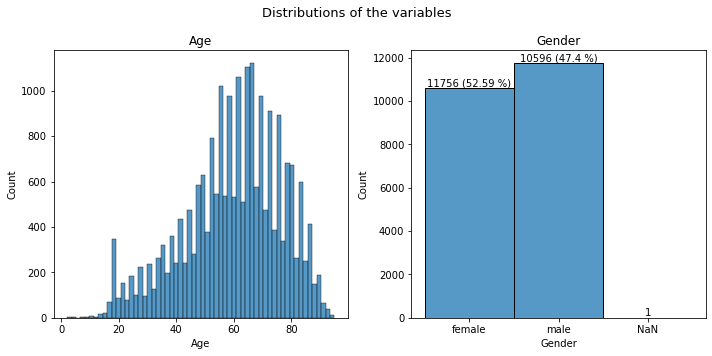

Total number of diagnoses mentioned is 56719 out of 60 individual diagnosis
The number of diagnoses a patient has varies from 1 to 10
Out of 60 individual diagnoses, 37 diagnoses are not used in the classification
leaving 23 diagnosis for the task


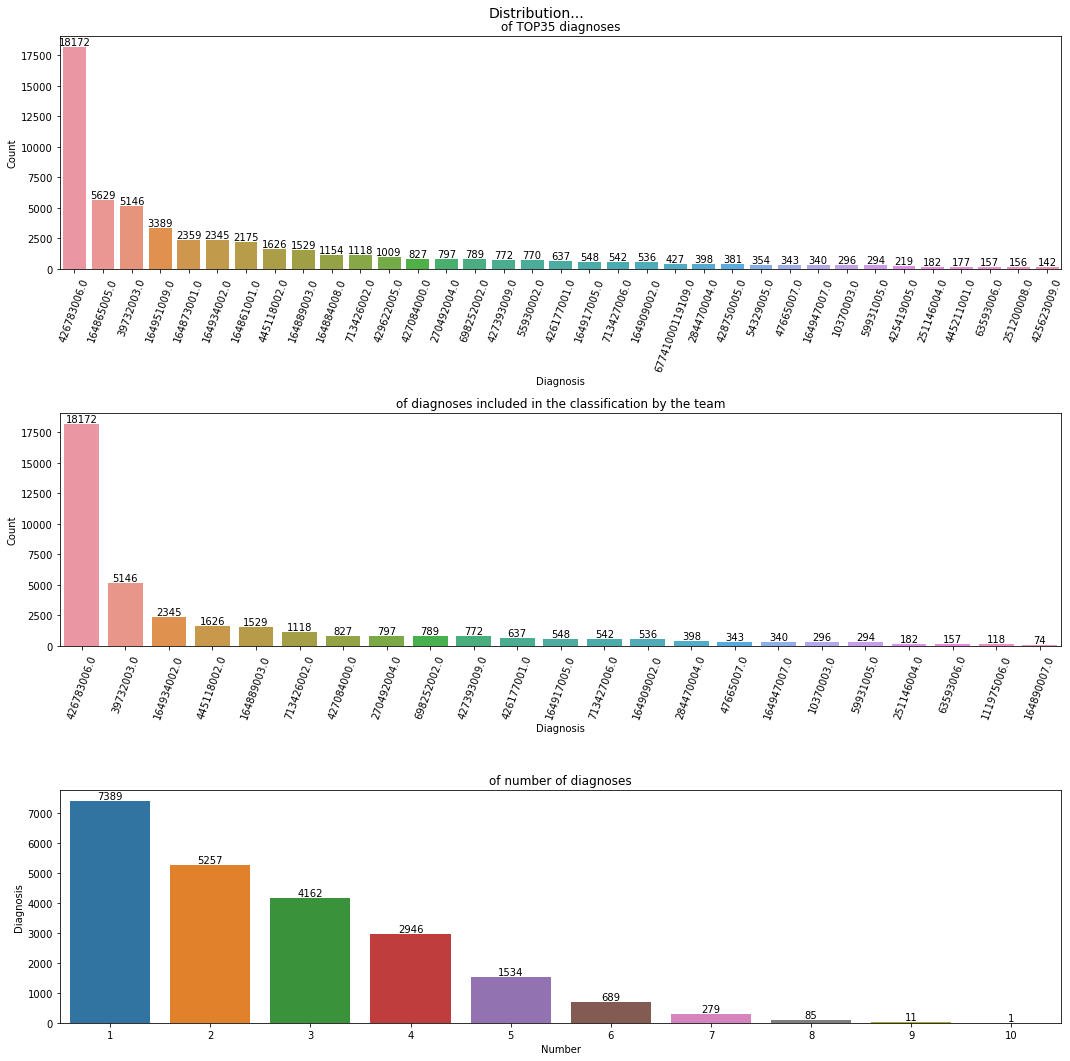

TOP5 diagnoses based on number out of all diagnoses:
426783006.0, 164865005.0, 39732003.0, 164951009.0, 164873001.0
TOP5 diagnoses based on number out of included diagnoses:
426783006.0, 39732003.0, 164934002.0, 445118002.0, 164889003.0

G12EC Database (sep: E)
Total of 10344 recordings


,Age,Gender,Diagnosis,file
10846,NaN,female,[426783006],E00001.hea
10847,NaN,female,[426783006],E00002.hea
10848,NaN,male,[426783006],E00003.hea
10849,75.0,male,"[426177001, 425623009, 164934002, 164873001]",E00004.hea
10850,83.0,male,"[59118001, 164889003]",E00005.hea


Descriptive information about the Age column:


count    10267.000000
mean        60.486802
std         15.434517
min         14.000000
25%         51.000000
50%         62.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

So the youngest patient is 14 and the oldest 89 years old


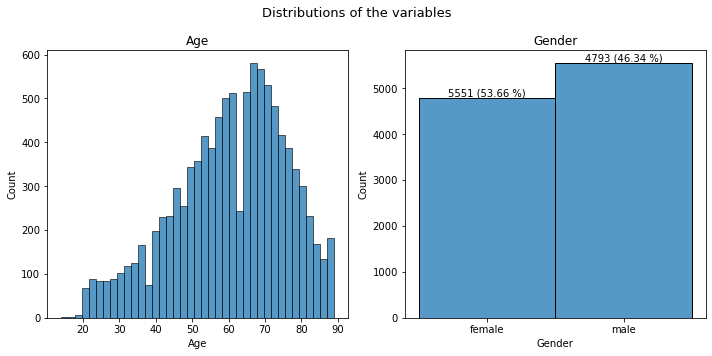

Total number of diagnoses mentioned is 23478 out of 67 individual diagnosis
The number of diagnoses a patient has varies from 1 to 10
Out of 67 individual diagnoses, 43 diagnoses are not used in the classification
leaving 24 diagnosis for the task


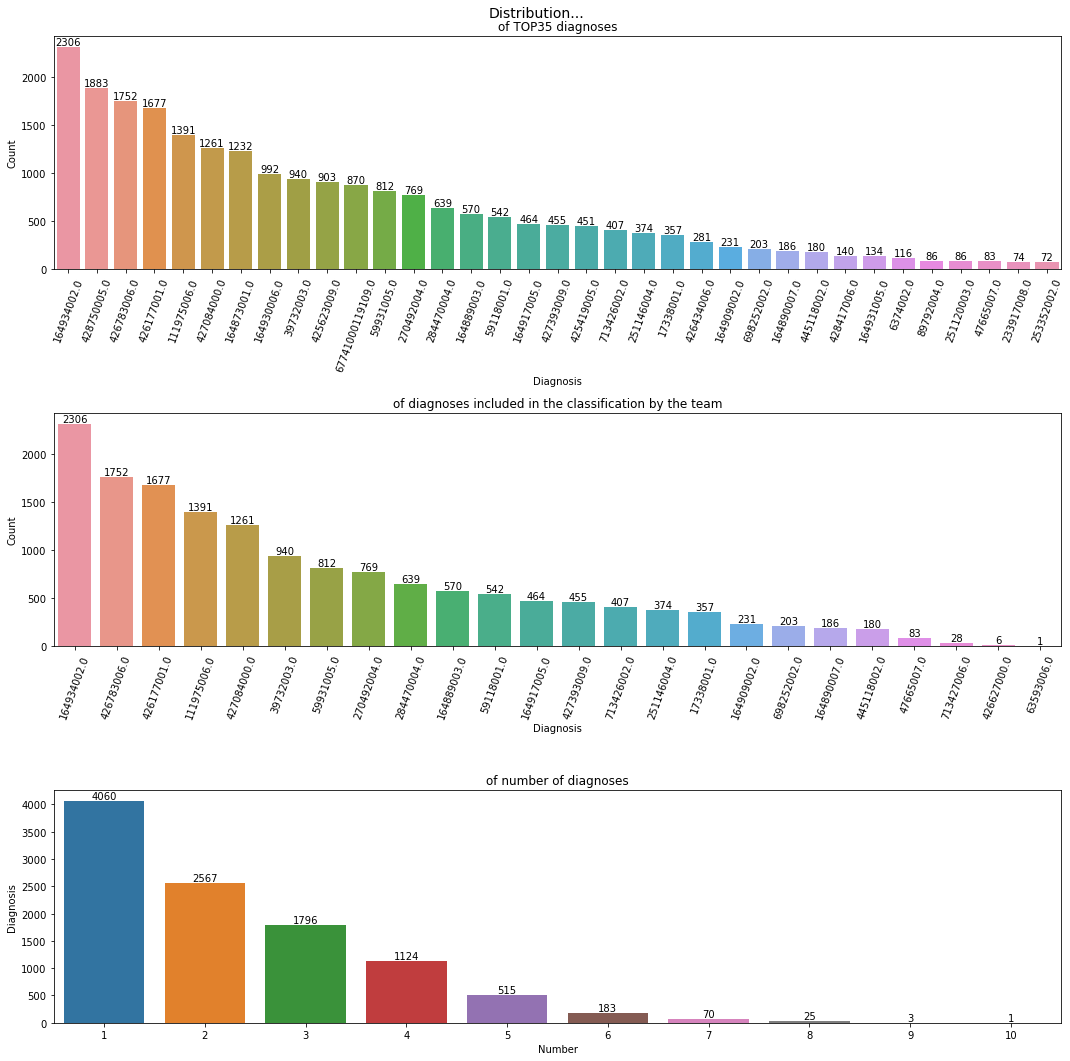

TOP5 diagnoses based on number out of all diagnoses:
164934002.0, 428750005.0, 426783006.0, 426177001.0, 111975006.0
TOP5 diagnoses based on number out of included diagnoses:
164934002.0, 426783006.0, 426177001.0, 111975006.0, 427084000.0

Chapman-Shaoxing and Ningbo Database (sep: JS)
Total of 45152 recordings


,Age,Gender,Diagnosis,file
21190,85.0,male,"[164889003, 59118001, 164934002]",JS00001.hea
21191,59.0,female,"[426177001, 164934002]",JS00002.hea
21192,66.0,male,[426177001],JS00004.hea
21193,73.0,female,"[164890007, 429622005, 428750005]",JS00005.hea
21194,46.0,female,[426177001],JS00006.hea


Descriptive information about the Age column:


count    45097.000000
mean        58.208462
std         19.688251
min          0.000000
25%         48.000000
50%         61.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

So the youngest patient is 0 and the oldest 89 years old


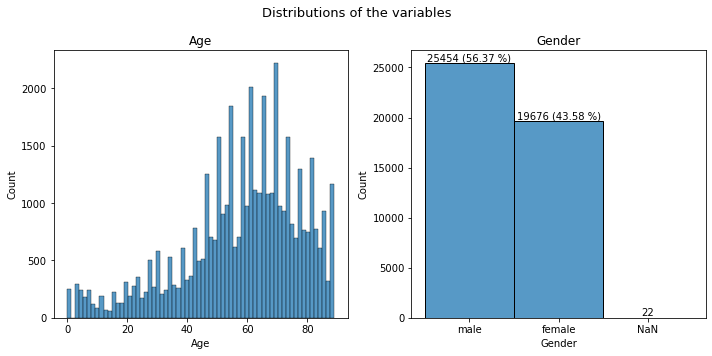

Total number of diagnoses mentioned is 87974 out of 94 individual diagnosis
The number of diagnoses a patient has varies from 1 to 12
Out of 94 individual diagnoses, 67 diagnoses are not used in the classification
leaving 27 diagnosis for the task


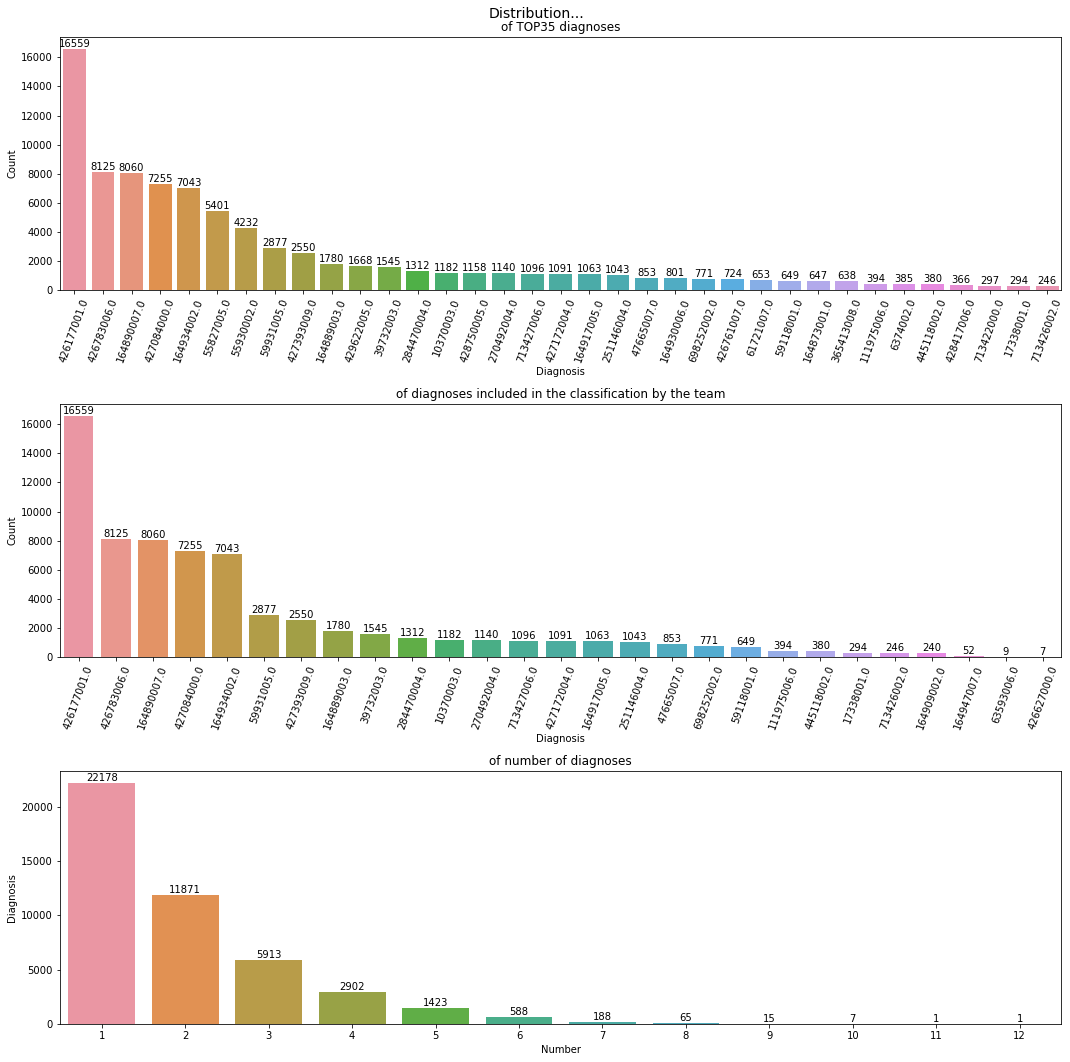

TOP5 diagnoses based on number out of all diagnoses:
426177001.0, 426783006.0, 164890007.0, 427084000.0, 164934002.0
TOP5 diagnoses based on number out of included diagnoses:
426177001.0, 426783006.0, 164890007.0, 427084000.0, 164934002.0



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#sources = "CPSC CPSC-Extra INCART PTB PTB-XL G12EC Chapman-Shaoxing Ningbo".split(" ")
# Exploring the data in different sources
for i, source in enumerate(source_dfs):
    list_source, list_sep = sources_and_seps[i]
    
    if "-&-" in list_source:
        sources = list_source.replace("-&-", " and ")
        print(color.BOLD + color.PURPLE + color.UNDERLINE + f"{sources} Database (sep: {list_sep})" + color.END)
    else: 
        print(color.BOLD + color.PURPLE + color.UNDERLINE + f"{list_source} Database (sep: {list_sep})" + color.END)
    
    print(f"Total of {len(source)} recordings")
    display(source.head(5))
    
    # Let's explore patients' ages and genders first
    print("Descriptive information about the Age column:")
    display(source['Age'].describe()) # excluding NaN values
    print(f"So the youngest patient is {source['Age'].min():.0f} and the oldest {source['Age'].max():.0f} years old")
    
    # It's plotting time! - Age and gender distributions
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle("Distributions of the variables", fontsize=13)
    
    # Age
    sns.histplot(source['Age'], ax=ax[0]).set(title='Age');
    #ax[0].bar_label(ax[0].containers[0]) # Age labels (count)
    
    # Gender
    sns.histplot(source['Gender'], ax=ax[1]).set(title='Gender');
    gender_labels = [str((source['Gender'] == "male").sum()) + " (" +
                        str(round(float((source['Gender'] == "male").sum()) / float(len(source['Gender']))*100, 2)) + " %)",
                     str((source['Gender'] == "female").sum()) + " (" +
                     str(round(float((source['Gender'] == "female").sum()) / float(len(source['Gender']))*100, 2)) + " %)"]

    ax[1].bar_label(ax[1].containers[0], labels=gender_labels) # Gender labels
    plt.tight_layout()
    plt.show()
    
    ##############
    
    # Then diagnoses
    dxs_temp = [float(diagnoses[0]) if len(diagnoses)==1 else float(dx) for diagnoses in source['Diagnosis'] for dx in diagnoses]
    dx_min = source['Diagnosis'].map(len).min() # min num of diagnoses in one patient
    dx_max = source['Diagnosis'].map(len).max() # max num of diagnoses in one patient
    print(f"Total number of diagnoses mentioned is {len(dxs_temp)} out of {len(set(dxs_temp))} individual diagnosis")
    print(f"The number of diagnoses a patient has varies from {dx_min} to {dx_max}")
    
    # Let's see if all diagnoses are the ones which are used in the classification task
    not_included_dx = list(set(dxs_temp) - set(scored_labels2020['SNOMED CT Code']))
    print(f"Out of {len(set(dxs_temp))} individual diagnoses, {len(not_included_dx)} diagnoses are not used in the classification")
    # So let's see which diagnoses are included
    included_dx = [x for x in set(dxs_temp) if x in set(scored_labels2020['SNOMED CT Code'])]
    #print(included_dx)
    print(f"leaving {color.UNDERLINE}{len(included_dx)} diagnosis for the task{color.END}")
    
    # More plotting!
    # If there are diagnoses which are included, let's see their distributions
    if len(included_dx) > 0:
        if dx_max > 1:
            fig, ax = plt.subplots(3,1, figsize=(15,15))
        else:
            fig, ax = plt.subplots(1,2, figsize=(10,5))
    
        fig.suptitle("Distribution...", fontsize=14)
        
        # All diagnoses
        all_dx = pd.DataFrame({"Diagnosis": list(set(dxs_temp))})
        all_dx["Count"] = [dxs_temp.count(dx) for dx in set(dxs_temp)]
        all_dx.sort_values(by=["Count"], ascending=False, inplace = True)
        
        sns.barplot(x="Diagnosis", y="Count", data=all_dx, ax=ax[0],
                   order = all_dx.sort_values("Count", ascending=False).Diagnosis.iloc[:35]).set(
            title="of TOP35 diagnoses")
        
        ax[0].bar_label(ax[0].containers[0]) # All diagnosis labels
        
        # Included diagnoses
        dx_df_temp = pd.DataFrame({"Diagnosis": included_dx})
        dx_df_temp["Count"] = [dxs_temp.count(dx) for dx in included_dx]
        dx_df_temp.sort_values(by=["Count"], ascending=False, inplace = True)
        
        sns.barplot(x="Diagnosis", y="Count", data=dx_df_temp, ax=ax[1],
                   order = dx_df_temp.sort_values("Count", ascending=False).Diagnosis).set(
            title="of diagnoses included in the classification by the team")
        
        ax[1].bar_label(ax[1].containers[0]) # All diagnosis labels
        
        # Including diagnoses counts per patient if more than 1 included
        if dx_max > 1:
            num_diagnoses = list(range(dx_min, dx_max+1)) # get range of diagnoses count
            dx_sums = pd.DataFrame(source['Diagnosis'].str.len().value_counts().reindex(num_diagnoses[::-1], fill_value=0))
            sns.barplot(data=dx_sums, x=dx_sums.index, y='Diagnosis', ax=ax[2]).set(
                title="of number of diagnoses", xlabel="Number");
            ax[2].bar_label(ax[2].containers[0]) # Diagnosis labels (count)
        
        ax[0].tick_params(axis="x", rotation=70)
        ax[1].tick_params(axis="x", rotation=70)
        plt.tight_layout();
        plt.show();
        print(f"TOP5 diagnoses based on number out of all diagnoses:")
        print(*all_dx['Diagnosis'].values[:5], sep=", ")
        print(f"TOP5 diagnoses based on number out of included diagnoses:")
        print(*dx_df_temp['Diagnosis'].values[:5], sep=", ")
    else:
        print(f"No diagnosis was included in the classification: the only diagnosis was {set(dxs_temp)}")
        
    print()

The challenge of 2021 included 133 diagnoses in total from which 30 was focus of special interest in scoring the algorithms. 

**The next step is to look at the whole data.**

In [10]:
import math

# Most prevalent diagnoses of all sources
from collections import Counter

# Physionet2021 challenge diagnoses
unscored_path = "https://raw.githubusercontent.com/physionetchallenges/evaluation-2021/main/dx_mapping_unscored.csv"
scored_path = "https://raw.githubusercontent.com/physionetchallenges/evaluation-2021/main/dx_mapping_scored.csv"

unscored_labels = pd.read_csv(unscored_path, delimiter=",")
scored_labels2021 = pd.read_csv(scored_path, delimiter=",")
all_labels2021 = pd.concat([scored_labels2021, unscored_labels], ignore_index=True) # All the labels
#display(all_labels2021.head(5))
all_dxs = [float(diagnoses[0]) if len(diagnoses)==1 else float(dx) for diagnoses in df['Diagnosis'] for dx in diagnoses]
counts = Counter(all_dxs)

# Most prevalent diagnoses
scored_2020_2021 = list() # Diagnoses scored both in 2020 and 2021
print(color.BOLD + color.CYAN + "35 most prevalent diagnoses in the whole training data are" + color.END)
print("(" + color.BOLD + color.RED + "not included in the challenge 2020 scoring" + color.END, end = "")
print(" and", color.BOLD + color.GREEN + "not included in the challenge 2021 scoring" + color.END + ")")
for key, value in counts.most_common(35):

    label = all_labels2021.loc[all_labels2021['SNOMEDCTCode'].values == key, 'Dx'].iloc[0]
    print(f"- {label} [{key:.0f}] -- {value} pcs", end="")
    
    label_not_exist_2020 = int(key) not in scored_labels2020['SNOMED CT Code'].values
    if label_not_exist_2020:
        print(color.BOLD + color.RED + " X " + color.END, end="")
    
    label_not_exist_2021 = int(key) not in scored_labels2021['SNOMEDCTCode'].values
    if label_not_exist_2021:
        print(color.BOLD + color.GREEN + " X " + color.END, end="")
    print()
    
    if not label_not_exist_2020 and not label_not_exist_2021:
        scored_2020_2021.append((label, key, value))
    
print()
print(color.BOLD + color.CYAN + f"... so the following diagnoses are included in the scoring of both years (total of {len(scored_2020_2021)})" + color.END)
for label, key, value in scored_2020_2021:
    print(f"- {label} [{key:.0f}] -- {value} pcs")

print()
print(color.BOLD + color.CYAN + "The diagnoses not included in 2020 but in 2021:" + color.END)
# There are few diagnoses more in the 2021 challenge than in the previous year 
# Let's find out if they are the same and which are added to 2021
# Let's also check if the new diagnoses are scored as the same diagnosis with some other diagnosis
# The information is in the Notes column
for dx in scored_labels2021['SNOMEDCTCode']:
    
    label_exist = int(dx) in scored_labels2020['SNOMED CT Code'].values
    if not label_exist:
        label, notes = scored_labels2021.loc[scored_labels2021['SNOMEDCTCode'].values == dx, ['Dx', 'Notes']].iloc[0]
        print(f"- {label} [{dx}]")
        print(f"\t Notes: {notes}")

35 most prevalent diagnoses in the whole training data are
(not included in the challenge 2020 scoring and not included in the challenge 2021 scoring)
- sinus rhythm [426783006] -- 28971 pcs
- sinus bradycardia [426177001] -- 18918 pcs
- t wave abnormal [164934002] -- 11716 pcs
- sinus tachycardia [427084000] -- 9657 pcs
- atrial flutter [164890007] -- 8374 pcs
- left axis deviation [39732003] -- 7631 pcs
- myocardial infarction [164865005] -- 6144 pcs X  X 
- left ventricular high voltage [55827005] -- 5401 pcs X  X 
- atrial fibrillation [164889003] -- 5255 pcs
- s t changes [55930002] -- 5009 pcs X  X 
- nonspecific st t abnormality [428750005] -- 4712 pcs X  X 
- left ventricular hypertrophy [164873001] -- 4406 pcs X  X 
- t wave inversion [59931005] -- 3989 pcs
- sinus arrhythmia [427393009] -- 3790 pcs
- st depression [429622005] -- 3645 pcs X  X 
- 1st degree av block [270492004] -- 3534 pcs
- abnormal QRS [164951009] -- 3389 pcs X  X 
- right bundle branch block [59118001] -- 3

So the diagnoses 'complete left bundle branch block' (733534002) and 'left bundle branch block' (164909002) were considered as the same diagnosis, including the ones in the 2020 challenge:

* Complete right bundle branch block (713427006) and right bundle branch block (59118001)
* Premature atrial contraction (284470004) and supraventricular premature beats (63593006)
* Premature ventricular contractions (427172004) and ventricular premature beats (17338001)

And nicely visualized stats:

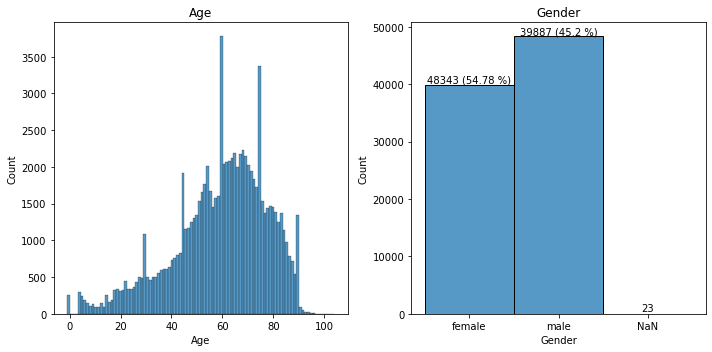

Total number of diagnoses mentioned is 181817 out of 133 individual diagnosis
The number of diagnoses a patient has varies from 1 to 12
Out of 133 individual diagnoses, 106 diagnoses are not used in the classification
leaving 27 diagnosis for the task


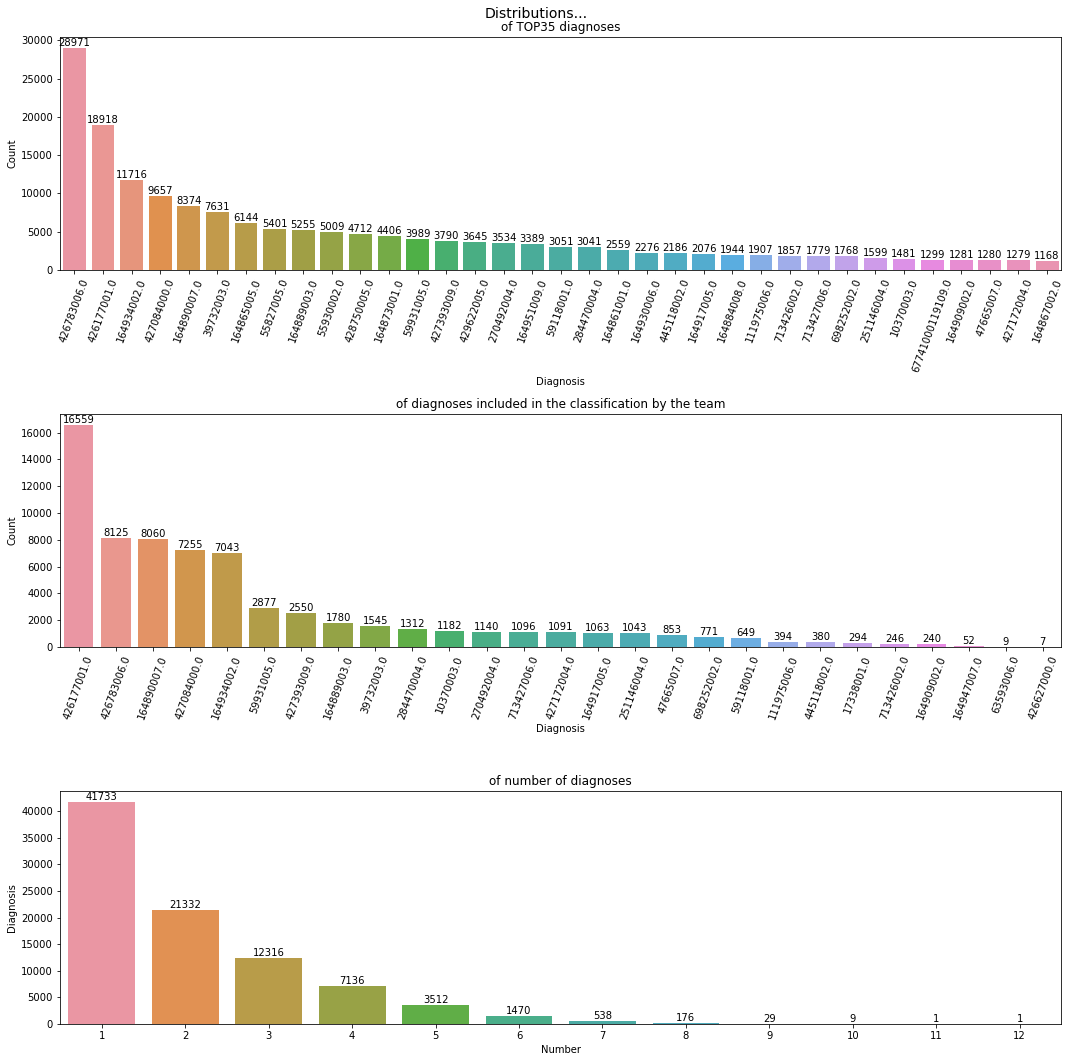

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Age
sns.histplot(df['Age'], ax=ax[0]).set(title='Age');
#ax[0].bar_label(ax[0].containers[0]) # Age labels (count)

# Gender
sns.histplot(df['Gender'], ax=ax[1]).set(title='Gender');
gender_labels = [str((df['Gender'] == "male").sum()) + " (" +
                str(round(float((df['Gender'] == "male").sum()) / float(len(df['Gender']))*100, 2)) + " %)",
                 str((df['Gender'] == "female").sum()) + " (" +
                 str(round(float((df['Gender'] == "female").sum()) / float(len(df['Gender']))*100, 2)) + " %)"]

ax[1].bar_label(ax[1].containers[0], labels=gender_labels) # Gender labels
plt.tight_layout()
plt.show();

fig, ax = plt.subplots(3,1, figsize=(15, 15))
# Diagnoses
dx_min = df['Diagnosis'].map(len).min() # min num of diagnoses in one patient
dx_max = df['Diagnosis'].map(len).max() # max num of diagnoses in one patient
print(f"Total number of diagnoses mentioned is {len(all_dxs)} out of {len(set(all_dxs))} individual diagnosis")
print(f"The number of diagnoses a patient has varies from {dx_min} to {dx_max}")
    
# Let's see if all diagnoses are the ones which are used in the classification task
not_included_dx = list(set(all_dxs) - set(scored_labels2020['SNOMED CT Code']))
print(f"Out of {len(set(all_dxs))} individual diagnoses, {len(not_included_dx)} diagnoses are not used in the classification")
# So let's see which diagnoses are included
included_dx = [x for x in set(all_dxs) if x in set(scored_labels2020['SNOMED CT Code'])]
#print(included_dx)
print(f"leaving {color.UNDERLINE}{len(included_dx)} diagnosis for the task{color.END}")
    
fig.suptitle("Distributions...", fontsize=14)
        
# All diagnoses
all_dx = pd.DataFrame({"Diagnosis": list(set(all_dxs))})
all_dx["Count"] = [all_dxs.count(dx) for dx in set(all_dxs)]
all_dx.sort_values(by=["Count"], ascending=False, inplace = True)
        
sns.barplot(x="Diagnosis", y="Count", data=all_dx, ax=ax[0],
            order = all_dx.sort_values("Count", ascending=False).Diagnosis.iloc[:35]).set(
            title="of TOP35 diagnoses")
        
ax[0].bar_label(ax[0].containers[0]) # All diagnosis labels
        
# Included diagnoses
dx_df_temp = pd.DataFrame({"Diagnosis": included_dx})
dx_df_temp["Count"] = [dxs_temp.count(dx) for dx in included_dx]
dx_df_temp.sort_values(by=["Count"], ascending=False, inplace = True)

sns.barplot(x="Diagnosis", y="Count", data=dx_df_temp, ax=ax[1],
           order = dx_df_temp.sort_values("Count", ascending=False).Diagnosis).set(
            title="of diagnoses included in the classification by the team")
        
ax[1].bar_label(ax[1].containers[0]) # All diagnosis labels
        
num_diagnoses = list(range(dx_min, dx_max+1)) # get range of diagnoses count
dx_sums = pd.DataFrame(df['Diagnosis'].str.len().value_counts().reindex(num_diagnoses[::-1], fill_value=0))
sns.barplot(data=dx_sums, x=dx_sums.index, y='Diagnosis', ax=ax[2]).set(
            title="of number of diagnoses", xlabel="Number");
ax[2].bar_label(ax[2].containers[0]) # Diagnosis labels (count)
        
ax[0].tick_params(axis="x", rotation=70)
ax[1].tick_params(axis="x", rotation=70)

plt.subplots_adjust(hspace=1)
plt.tight_layout();
plt.show();

------

## Filtering the data with only the most prevalent diagnoses

Next we'd like the dataset contain only recordings in which the prevalent diagnoses occures. Previously we saw 35 most prevalent diagnoses from which 23 were included in the scoring of both challenge years, 2020 and 2021. Let's use these as an example.

In [1]:
# So let's find out if all the databases even contain these diagnoses

# SNOMED Codes for 23 most prevalent diagnoses
filtering_dx = [int(key) for label, key, value in scored_2020_2021]

for i, source in enumerate(source_dfs):
    list_source, list_sep = sources_and_seps[i]
    
    if "-&-" in list_source:
        sources = list_source.replace("-&-", " and ")
        print(color.BOLD + color.PURPLE + f"{sources} Database:" + color.END, end = "")
    else: 
        print(color.BOLD + color.PURPLE + f"{list_source} Database:" + color.END, end = "")
    
    # All diagnoses from the database
    dxs_temp = set(float(diagnoses[0]) if len(diagnoses)==1 else float(dx) for diagnoses in source['Diagnosis'] for dx in diagnoses)
    
    if any(diagnosis in dxs_temp for diagnosis in filtering_dx):
        included = [diagnosis in dxs_temp for diagnosis in filtering_dx]
        included_count = included.count(True)
        print(f" {included_count}/{len(filtering_dx)} diagnoses found from the database ")
        
        # Since visual presentations are alwyas nice, let's see the distribution of filtering diagnoses
        all_dx_temp = [float(diagnoses[0]) if len(diagnoses)==1 else float(dx) for diagnoses in source['Diagnosis'] for dx in diagnoses]
        filtered_dx_temp = [dx for dx in all_dx_temp if dx in filtering_dx]
        
        df_temp = pd.DataFrame({"Diagnosis": list(set(filtered_dx_temp))})
        df_temp["Count"] = [filtered_dx_temp.count(dx) for dx in set(filtered_dx_temp)]

        #df_temp.sort_values(by=["Count"], ascending=False, inplace = True)
        sns.barplot(x="Diagnosis", y="Count", data=df_temp,
                    order = df_temp.sort_values("Count", ascending=False).Diagnosis).set(
                    title="Distribution of the filtering diagnoses in the database");
        
        plt.xticks(rotation=45)
        plt.show();
        
    else:
        print(f" diagnoses not found from the database")
    print()


NameError: name 'scored_2020_2021' is not defined

In [13]:
filtered_df = pd.DataFrame()

# Filtering out the patient without the most prevalent diagnoses
# Doing this in separate source dataframes
total_filtered = 0
for i, source in enumerate(source_dfs):
    print(f"Filtering the {i+1}. source....")
    
    filtered_data = source.copy() # Not to mess up with the original ones
    n_rows = len(source)
    filtered_rows = 0
    dropping_index = list()

    # Going through all the diagnoses in the Diagnosis column of the source dataframe
    for row, dx in zip(filtered_data.index, filtered_data['Diagnosis']):
        
        # If patient has more than 1 diagnosis (list of them)
        if len(dx) > 1:
            exists = list()
            for patient_dx in dx: 
                ex = int(patient_dx) not in filtering_dx # patient dx not included in filtering ones
                exists.append(ex)

            # If all patient diagnoses don't exist in filtering diagnoses, can be dropped
            # NB! If one diagnosis exists and others don't, doesn't drop
            if all(exist == True for exist in exists):
                #print("Dropping index", row, "Cause", exists)
                dropping_index.append(row)
                filtered_rows += 1

        # If patient has only 1 diagnosis
        else:
            if int(dx[0]) not in filtering_dx: # diagnosis not included in filtering ones
                #print("Dropping index", row, "cause dx", dx, "is", (int(dx[0]) not in filtering_dx))
                dropping_index.append(row)
                filtered_rows += 1

        if (row % 2000) == 0:
            print(f"- {row}/{n_rows} rows executed - filtered {filtered_rows} row(s) in total")
    
    total_filtered += filtered_rows
    filtered_data.drop(dropping_index, inplace = True)
    #print(filtered_data)
    filtered_df = pd.concat([filtered_df, filtered_data])
    print(f"At this point, the length of filtered data is {len(filtered_df)}")
    print(f"{i+1}. source done!")
    print("-"*50)
            
print("Filtering done!")
print()
print(f"The length of the filtered dataframe is now {len(filtered_df)}")
print(f"Filtered out {total_filtered} rows in total")

Filtering the 1. source....
- 0/10330 rows executed - filtered 0 row(s) in total
- 2000/10330 rows executed - filtered 462 row(s) in total
- 4000/10330 rows executed - filtered 928 row(s) in total
- 6000/10330 rows executed - filtered 1396 row(s) in total
- 8000/10330 rows executed - filtered 2428 row(s) in total
- 10000/10330 rows executed - filtered 3797 row(s) in total
At this point, the length of filtered data is 6298
1. source done!
--------------------------------------------------
Filtering the 2. source....
At this point, the length of filtered data is 6319
2. source done!
--------------------------------------------------
Filtering the 3. source....
- 0/22353 rows executed - filtered 1 row(s) in total
- 2000/22353 rows executed - filtered 450 row(s) in total
- 4000/22353 rows executed - filtered 481 row(s) in total
- 6000/22353 rows executed - filtered 502 row(s) in total
- 8000/22353 rows executed - filtered 526 row(s) in total
- 10000/22353 rows executed - filtered 548 row(s

In [14]:
display(filtered_df) # The filtered dataframe
filtered_dx = [float(diagnoses[0]) if len(diagnoses)==1 else float(dx) for diagnoses in filtered_df['Diagnosis'] for dx in diagnoses]
print(f"The original dataframe contained {len(all_dx)} diagnosis in total")
print(f"and the filtered one contains now {len(set(filtered_dx))} diagnosis in total")

,Age,Gender,Diagnosis,file
0,74.0,male,[59118001],A0001.hea
1,49.0,female,[426783006],A0002.hea
2,81.0,female,[164889003],A0003.hea
3,45.0,male,[164889003],A0004.hea
5,29.0,male,[59118001],A0006.hea
...,...,...,...,...
88074,4.0,male,"[698252002, 426761007, 74390002]",JS45373.hea
88081,61.0,female,"[429622005, 59931005, 164934002, 426761007, 55...",JS45380.hea
88146,0.0,female,"[164896001, 10370003]",JS45445.hea
88209,0.0,male,"[61277005, 251146004, 55930002, 425856008]",JS45508.hea


The original dataframe contained 133 diagnosis in total
and the filtered one contains now 124 diagnosis in total


It should be noted that since the filtering function only dropped the patients with multiple diagnoses which were ALL not included in the filtering diagnoses. So there can be patients with multiple diagnoses from which only one belongs to the filtering diagnoses and others don't. This of course affects the count of diagnoses in the filtered dataframe.

Sure we could doublecheck if all patient still have at least one filtering diagnosis.

In [15]:
patient_multiple_dx = list(filter(lambda dx: len(dx) > 1, filtered_df['Diagnosis'])) # only patient with multiple diagnoses
atleast_one = 0
for diagnoses in patient_multiple_dx:
    for one_dx in diagnoses:
        if int(one_dx) in filtering_dx:
            atleast_one += 1
            break

print("At least one diagnosis from multiple included in filtering diagnoses:", atleast_one == len(patient_multiple_dx))

At least one diagnosis from multiple included in filtering diagnoses: True


-----------

Then it's time for the ECG data itself. First, let's read some theory about them.

## Understanding an ECG by [GeekyMedics.com](https://geekymedics.com/understanding-an-ecg/)


### Parts of the ECG explained
**P waves** represent atrial depolarisation. In healthy individuals, there should be a P wave preceding each QRS complex.

The **PR interal** begins at the start of the P wave and ends at the beginning of the Q wave. It represents the time taken for electrical activity to move between the atria and the ventricles.

The **QRS complex** represents depolarisation of the ventricles. It appears as three closely related waves on the ECG (the Q, R and S wave).

The **ST segment** starts at the end of the S wave and ends at the beginning of the T wave. It's an isoelectric line that represents the time between depolarisation and repolarisation of the ventricles (i.e. ventricular contraction).

The **T wave** represents ventricular repolarisation. It appears as a small wave after the QRS complex.

The **RR interval** begins at the peak of one R wave and ends at the peak of the next R wave. It represents the time between two QRS complexes.

The **QT interval** begins at the start of the QRS complex and finishes at the end of the T wave. It represents the time taken for the ventricles to depolarise and then repolarise. 


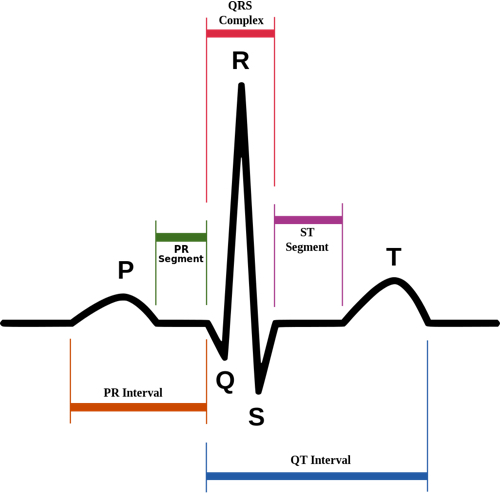

### How the 12-lead ECG works

An ECG lead and an ECG electrode are two separate things: 

The electrodes are attached to the skin to record electrical activity. They can be divided into two categories: There are six chest electrodes from V1 to V6, and four limb electrodes, red, yellow, green and black.

The leads are graphical representations of the heart's electrical activity which is calculated by analysing the data several electrodes provide. They can be also divided into two categories: The chest leads are similarly from V1 to V6 and the other leads are leads I-III, aVR, aVL and aVF. It's important to understand which leads represent which anatomical territory of the heart, allowing to localise pathology to a particular heart region. This can be defined as

| View of heart | Leads | 
|---------------|-------|
| Inferior | II, III, aVF | 
| Lateral | I, aVL, aVR, V5, V6 | 
| Anterior | V3, V4 |
| Septal | V1, V2 |

So each individual ECG recording is a little different in shape since they record the electrical activity of the heart from a different viewpoint. 

---

The ECG recordings of the challenge data are of variable duration (6-1800 s) and sampling frequency (257-1000 Hz), corresponding to variations in real life practice. To pre-process ECGs, the team resampled all of them to the minimum frequency of 257 Hz using linear interpolation. Each ECG was set to be 4096 points to allow a fixed input size in the deep learning model. 

The length and sample frequency of each data source are as follows:
- **CPSC and CPSC-Extra**: Each recording is between 6 and 144 seconds long with a sampling frequency of 500 Hz.
- **INCART**: Each recording is 30 minutes long with a sampling frequency of 257 Hz.
- **PTB**: Each recording is sampled at 1000 Hz.
- **PTB-XL**: Each recording is 10 seconds long with a sampling frequency of 500 Hz.
- **G12EC**: Each recording is between 5 and 10 seconds long with a sampling frequency of 500 Hz.
- **Chapman-Shaoxing and Ningbo**: Each recording is 10 seconds long with a sampling frequency of 500 Hz.

For the ***training data, the challenge participants were given signals from all twelve leads*** but for the test and validation sets the signal data was given for the lead combinations described as follows:

| Number of leads | Lead combination | 
|---------------|-------|
| 2 | I, II | 
| 3 | I, II, V2 | 
| 4 | I, II, III, V2 |
| 6 | I, II, III, aVR, aVL, aVF |
| 12 | I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6 |

In [16]:
# Let's load all the ECG recordings and headers then
n_files = len(header_files)
recordings = list() # ECG signals as numpy arrays
headers = list() 
# Loading the challenge data: ECG recordings and headers
for i in range(n_files):
    recording, header = load_challenge_data(header_files[i])
    recordings.append(recording)
    headers.append(header)

print(f"There are {len(headers)} headers and {len(recordings)} recordings (= total of {len(headers)+len(recordings)} files) in the directories")
print("-"*50)
print()
print("The first ECG recording including the converted ECG signal and the header is:\n")
# Printing the first ECG recording
header_print = headers[0]
rec_print = recordings[0]
for line in range(18):
    if line == 0:
        print(header_print[line])
    # Print ECG singal props and the converted .mat
    elif line > 0 and line < 13:
        print(header_print[line], rec_print[line-1], sep=":")
    else:
        print(header_print[line])

There are 88253 headers and 88253 recordings (= total of 176506 files) in the directories
--------------------------------------------------

The first ECG recording including the converted ECG signal and the header is:

S0001 12 1000 38400 15-May-2020 15:22:05

S0001.mat 16+24 1000/mv 16 0 -245 -3730 0 I
:[-245. -243. -242. ...  152.  136.  135.]
S0001.mat 16+24 1000/mv 16 0 -229 -8032 0 II
:[-229. -234. -235. ...  270.  256.  259.]
S0001.mat 16+24 1000/mv 16 0 16 4606 0 III
:[ 16.   9.   7. ... 118. 121. 125.]
S0001.mat 16+24 1000/mv 16 0 237 781 0 aVR
:[ 237.  238.  238. ... -211. -197. -197.]
S0001.mat 16+24 1000/mv 16 0 -130 4144 0 aVL
:[-130. -126. -124. ...   17.    8.    6.]
S0001.mat 16+24 1000/mv 16 0 -107 -8157 0 aVF
:[-107. -113. -114. ...  194.  189.  192.]
S0001.mat 16+24 1000/mv 16 0 -44 -9547 0 V1
:[-44. -42. -44. ... -84. -89. -92.]
S0001.mat 16+24 1000/mv 16 0 -121 1335 0 V2
:[-121. -118. -118. ...   98.   88.   82.]
S0001.mat 16+24 1000/mv 16 0 -56 -7472 0 V3
:[-56. 

***NB! The following helper functions are not used in the model in this repository.***

In [17]:
## Helper functions! ##
import numpy as np
from scipy.signal import butter, lfilter
from scipy import stats

def detect_peaks(ecg_measurements,signal_frequency,gain):

        """
        Method responsible for extracting peaks from loaded ECG measurements data through measurements processing.
        This implementation of a QRS Complex Detector is by no means a certified medical tool and should not be used in health monitoring. 
        It was created and used for experimental purposes in psychophysiology and psychology.
        You can find more information in module documentation:
        https://github.com/c-labpl/qrs_detector
        If you use these modules in a research project, please consider citing it:
        https://zenodo.org/record/583770
        If you use these modules in any other project, please refer to MIT open-source license.
        If you have any question on the implementation, please refer to:
        Michal Sznajder (Jagiellonian University) - technical contact (msznajder@gmail.com)
        Marta lukowska (Jagiellonian University)
        Janko Slavic peak detection algorithm and implementation.
        https://github.com/c-labpl/qrs_detector
        https://github.com/jankoslavic/py-tools/tree/master/findpeaks
        
        MIT License
        Copyright (c) 2017 Michal Sznajder, Marta Lukowska
    
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
        FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
        AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
        LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
        OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
        SOFTWARE.
        """


        print("Detecting peaks...")
        filter_lowcut = 0.001
        filter_highcut = 15.0
        filter_order = 1
        integration_window = 30  # Change proportionally when adjusting frequency (in samples).
        findpeaks_limit = 0.35
        findpeaks_spacing = 100  # Change proportionally when adjusting frequency (in samples).
        refractory_period = 240  # Change proportionally when adjusting frequency (in samples).
        qrs_peak_filtering_factor = 0.125
        noise_peak_filtering_factor = 0.125
        qrs_noise_diff_weight = 0.25


        # Detection results.
        qrs_peaks_indices = np.array([], dtype=int)
        noise_peaks_indices = np.array([], dtype=int)

        # Measurements filtering - 0-15 Hz band pass filter.
        filtered_ecg_measurements = bandpass_filter(ecg_measurements, lowcut=filter_lowcut, highcut=filter_highcut, signal_freq=signal_frequency, filter_order=filter_order)

        filtered_ecg_measurements[:5] = filtered_ecg_measurements[5]

        # Derivative - provides QRS slope information.
        differentiated_ecg_measurements = np.ediff1d(filtered_ecg_measurements)

        # Squaring - intensifies values received in derivative.
        squared_ecg_measurements = differentiated_ecg_measurements ** 2

        # Moving-window integration.
        integrated_ecg_measurements = np.convolve(squared_ecg_measurements, np.ones(integration_window)/integration_window)

        # Fiducial mark - peak detection on integrated measurements.
        detected_peaks_indices = findpeaks(data=integrated_ecg_measurements,
                                                     limit=findpeaks_limit,
                                                     spacing=findpeaks_spacing)

        detected_peaks_values = integrated_ecg_measurements[detected_peaks_indices]

        return detected_peaks_values,detected_peaks_indices


def bandpass_filter(data, lowcut, highcut, signal_freq, filter_order):
        """
        Method responsible for creating and applying Butterworth filter.
        :param deque data: raw data
        :param float lowcut: filter lowcut frequency value
        :param float highcut: filter highcut frequency value
        :param int signal_freq: signal frequency in samples per second (Hz)
        :param int filter_order: filter order
        :return array: filtered data
        """
        nyquist_freq = 0.5 * signal_freq
        low = lowcut / nyquist_freq
        high = highcut / nyquist_freq
        b, a = butter(filter_order, [low, high], btype="band")
        y = lfilter(b, a, data)
        return y

def findpeaks(data, spacing=1, limit=None):
        """
        Janko Slavic peak detection algorithm and implementation.
        https://github.com/jankoslavic/py-tools/tree/master/findpeaks
        Finds peaks in `data` which are of `spacing` width and >=`limit`.
        :param ndarray data: data
        :param float spacing: minimum spacing to the next peak (should be 1 or more)
        :param float limit: peaks should have value greater or equal
        :return array: detected peaks indexes array
        """
        len = data.size
        x = np.zeros(len + 2 * spacing)
        x[:spacing] = data[0] - 1.e-6
        x[-spacing:] = data[-1] - 1.e-6
        x[spacing:spacing + len] = data
        peak_candidate = np.zeros(len)
        peak_candidate[:] = True
        for s in range(spacing):
            start = spacing - s - 1
            h_b = x[start: start + len]  # before
            start = spacing
            h_c = x[start: start + len]  # central
            start = spacing + s + 1
            h_a = x[start: start + len]  # after
            peak_candidate = np.logical_and(peak_candidate, np.logical_and(h_c > h_b, h_c > h_a))

        ind = np.argwhere(peak_candidate)
        ind = ind.reshape(ind.size)
        if limit is not None:
            ind = ind[data[ind] > limit]
        return ind


def get_12ECG_features(data, header_data):

    print(color.BOLD + "Getting 12-lead ECG features..." + color.END)
    tmp_hea = header_data[0].split(' ')
    ptID = tmp_hea[0]
    num_leads = int(tmp_hea[1])
    sample_Fs= int(tmp_hea[2])
    gain_lead = np.zeros(num_leads)
    
    for ii in range(num_leads):
        tmp_hea = header_data[ii+1].split(' ')
        gain_lead[ii] = int(tmp_hea[2].split('/')[0])

    # for testing, we included the mean age of 57 if the age is a NaN
    # This value will change as more data is being released
    for iline in header_data:
        if iline.startswith('#Age'):
            tmp_age = iline.split(': ')[1].strip()
            age = int(tmp_age if tmp_age != 'NaN' else 57)
        elif iline.startswith('#Sex'):
            tmp_sex = iline.split(': ')[1]
            if tmp_sex.strip()=='Female':
                sex =1
            else:
                sex=0
#        elif iline.startswith('#Dx'):
#            label = iline.split(': ')[1].split(',')[0]
    
    print("Age:", age)
    print("Sex:", sex)
    print("-"*50)
    print("Using only the data from lead I...")
#   We are only using data from lead1
    peaks,idx = detect_peaks(data[0],sample_Fs,gain_lead[0])
    
#   mean
    mean_RR = np.mean(idx/sample_Fs*1000)
    mean_Peaks = np.mean(peaks*gain_lead[0])
    print(color.UNDERLINE + "MEAN" + color.END)
    print(f"RR: {mean_RR} - Peaks: {mean_Peaks}")

#   median
    median_RR = np.median(idx/sample_Fs*1000)
    median_Peaks = np.median(peaks*gain_lead[0])
    print(color.UNDERLINE + "MEDIAN" + color.END)
    print(f"RR: {median_RR} - Peaks: {median_Peaks}")

#   standard deviation
    std_RR = np.std(idx/sample_Fs*1000)
    std_Peaks = np.std(peaks*gain_lead[0])
    print(color.UNDERLINE + "STD" + color.END)
    print(f"RR: {std_RR} - Peaks: {std_Peaks}")
          
#   variance
    var_RR = stats.tvar(idx/sample_Fs*1000)
    var_Peaks = stats.tvar(peaks*gain_lead[0])
    print(color.UNDERLINE + "VARIANCE" + color.END)
    print(f"RR: {var_RR} - Peaks: {var_Peaks}")

#   Skewness
    skew_RR = stats.skew(idx/sample_Fs*1000)
    skew_Peaks = stats.skew(peaks*gain_lead[0])
    print(color.UNDERLINE + "SKEWNESS" + color.END)
    print(f"RR: {skew_RR} - Peaks: {skew_Peaks}")

#   Kurtosis
    kurt_RR = stats.kurtosis(idx/sample_Fs*1000)
    kurt_Peaks = stats.kurtosis(peaks*gain_lead[0])
    print(color.UNDERLINE + "KURTOSIS" + color.END)
    print(f"RR: {kurt_RR} - Peaks: {kurt_Peaks}")

    features = np.hstack([age,sex,mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,std_Peaks,var_RR,var_Peaks,skew_RR,skew_Peaks,kurt_RR,kurt_Peaks])

    return features

##############################################################

# The method the team used to resample the ECG recording
def Resample(input_signal, src_fs, tar_fs):
    print(color.BOLD + "Resampling signal..."+ color.END, "-"*50,  sep="\n")
    if src_fs != tar_fs:
        dtype = input_signal.dtype
        print("-Dtype:", dtype)
        audio_len = input_signal.shape[1]
        print("-Audio length", audio_len)
        audio_time_max = 1.0 * (audio_len) / src_fs
        print("-Audio time max", audio_time_max)
        src_time = 1.0 * np.linspace(0, audio_len, audio_len) / src_fs
        tar_time = 1.0 * np.linspace(0, np.int64(audio_time_max * tar_fs), np.int64(audio_time_max * tar_fs)) / tar_fs
        print("-Source time:", src_time)
        print("-Target time:", tar_time)
        for i in range(input_signal.shape[0]):
            if i == 0:
                output_signal = np.interp(tar_time, src_time, input_signal[i, :]).astype(dtype)
                output_signal = output_signal.reshape(1, len(output_signal))
            else:
                tmp = np.interp(tar_time, src_time, input_signal[i, :]).astype(dtype)
                tmp = tmp.reshape(1, len(tmp))
                output_signal = np.vstack((output_signal, tmp))
    else:
        output_signal = input_signal
    print("Done.\n", "-"*50)
    return output_signal, src_time, tar_time

In [18]:
# File name
example_file = header_files[0] #random.sample(header_files, 1)[0]
# ECG recording and header
example_recording, example_header = load_challenge_data(example_file)
print("The example data is from the file {}".format(example_header[0].split(" ")[0]))

# MatLab v4 file
matlab_data = loadmat(example_file.replace('.hea', '.mat'))
matlab_data = np.asarray(matlab_data['val'], dtype=np.float64)
print("MATLAB data is formatted as such:\n", *matlab_data, sep = "\n")

# The target sample frequency the model used
target_fs = 257
# Sample frequency is found in the third value (index 2) of the first row
source_fs = np.int64(example_header[0].split(" ")[2])
# Resampling
print(f"The target sample frequency is 275 Hz and the one of example recording is {source_fs} Hz")
resampled_data, src_time, tar_time = Resample(matlab_data, source_fs, target_fs)
print("The data resampled by linear interpolation:\n", *resampled_data, sep="\n")
print("-"*50)
print(f"Shape of the original matlab data was {matlab_data.shape} and the shape of the resampled data is {resampled_data.shape}")
print("-"*50)
print("-"*50)
##########################
# Using the given algorithm from the challenge to get 12-lead ECG features
#age,sex,mean_RR,mean_Peaks,median_RR,median_Peaks,std_RR,std_Peaks,var_RR,var_Peaks,skew_RR,skew_Peaks,kurt_RR,kurt_Peaks
features = get_12ECG_features(example_recording, example_header)
#print(features)

The example data is from the file S0001
MATLAB data is formatted as such:

[-245. -243. -242. ...  152.  136.  135.]
[-229. -234. -235. ...  270.  256.  259.]
[ 16.   9.   7. ... 118. 121. 125.]
[ 237.  238.  238. ... -211. -197. -197.]
[-130. -126. -124. ...   17.    8.    6.]
[-107. -113. -114. ...  194.  189.  192.]
[-44. -42. -44. ... -84. -89. -92.]
[-121. -118. -118. ...   98.   88.   82.]
[-56. -51. -54. ...  73.  65.  59.]
[106. 110. 110. ... -78. -81. -84.]
[ 197.  202.  201. ... -121. -125. -125.]
[ 195.  198.  197. ... -162. -165. -167.]
The target sample frequency is 275 Hz and the one of example recording is 1000 Hz
Resampling signal...
--------------------------------------------------
-Dtype: float64
-Audio length 38400
-Audio time max 38.4
-Source time: [0.00000000e+00 1.00002604e-03 2.00005208e-03 ... 3.83979999e+01
 3.83990000e+01 3.84000000e+01]
-Target time: [0.00000000e+00 3.89144493e-03 7.78288987e-03 ... 3.83891043e+01
 3.83929957e+01 3.83968872e+01]
Done.
 -----

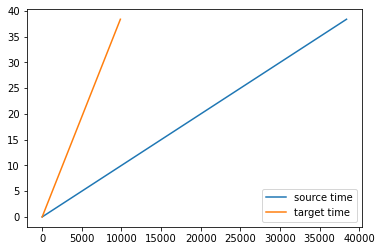

In [19]:
# Plotting the time intervals of the example recordings before and after resampling
plt.plot(src_time, label="source time");
plt.plot(tar_time, label="target time");
plt.legend();

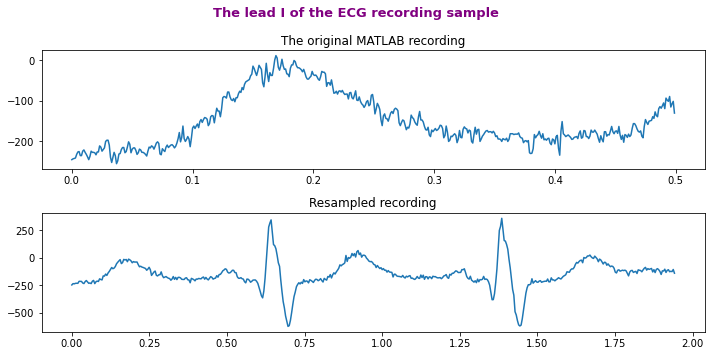

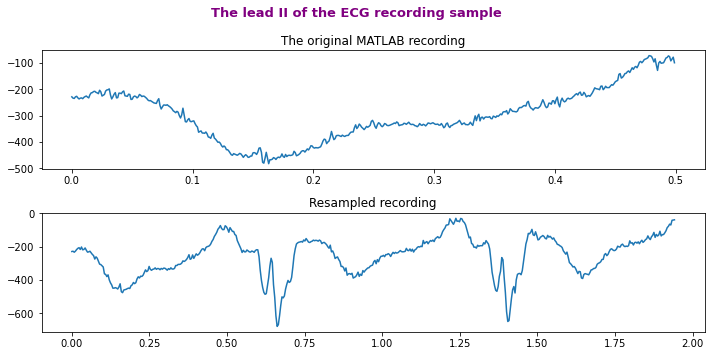

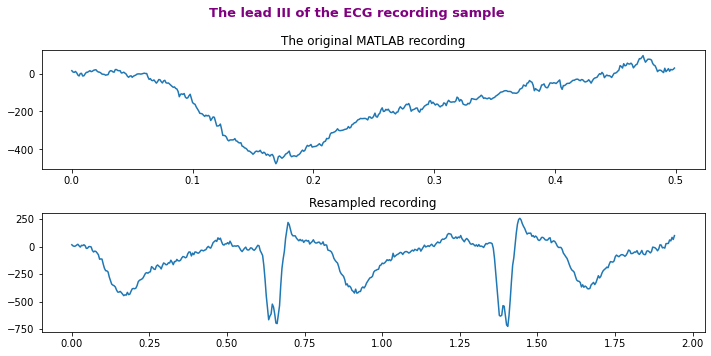

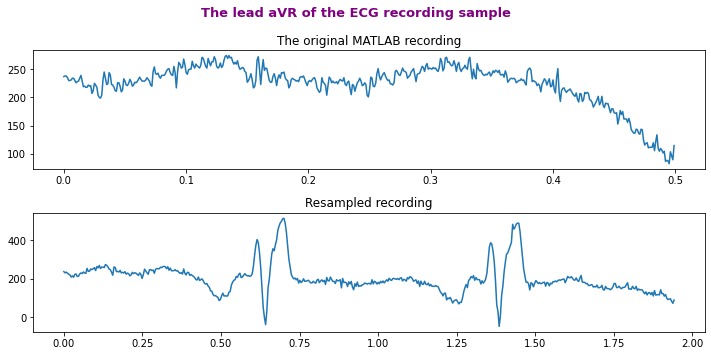

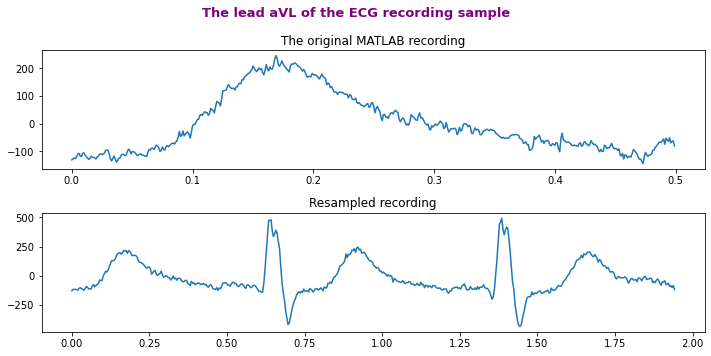

In [20]:
# Let's plot some leads of the sample recording
leads = "I II III aVR aVL aVF V1 V2 V3 V4 V5 V6".split(" ")
for i in range(0, 5):
    fig, ax = plt.subplots(2,1, figsize=(10,5))
    fig.suptitle(f"The lead {leads[i]} of the ECG recording sample", color="purple", fontweight="bold", size=13)
    ax[0].plot(src_time[:500], matlab_data[i, :500]);
    ax[0].set(title="The original MATLAB recording")
    ax[1].plot(tar_time[:500], resampled_data[i, :500]);
    ax[1].set(title="Resampled recording")
    fig.tight_layout()

So the recording length varies from 5.0 to 1800.0 seconds


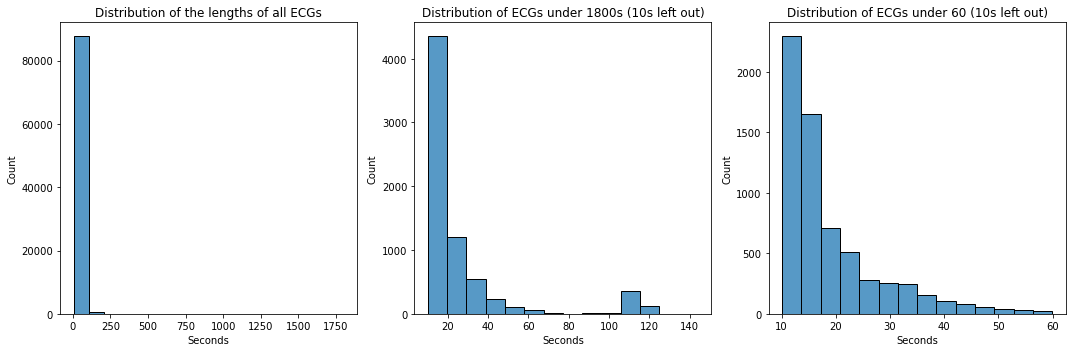

To see the real numbers - 20 most common lengths of 88 253 ECGs:
10 s - 81100 pcs
11 s - 460 pcs
15 s - 447 pcs
12 s - 391 pcs
115 s - 359 pcs
13 s - 341 pcs
14 s - 300 pcs
20 s - 268 pcs
16 s - 197 pcs
17 s - 176 pcs
21 s - 163 pcs
18 s - 148 pcs
19 s - 134 pcs
22 s - 117 pcs
120 s - 113 pcs
23 s - 89 pcs
24 s - 81 pcs
25 s - 77 pcs
1800 s - 74 pcs
26 s - 69 pcs


In [21]:
# Distribution of all the lengths of ECGs

max_times = list()
for header, recording in zip(headers, recordings):
    src_fs = np.int64(header[0].split(" ")[2])
    audio_len = recording.shape[1]
    src_time = 1.0 * np.linspace(0, audio_len, audio_len) / src_fs
    max_times.append(src_time[-1])


fig, ax = plt.subplots(1,3, figsize=(15,5))
print(f"So the recording length varies from {min(max_times)} to {max(max_times)} seconds")
sns.histplot(max_times, bins="sturges", ax = ax[0]).set(title="Distribution of the lengths of all ECGs", xlabel="Seconds");

# Getting rid of the longest ECGs to see the distribution of the smaller ones
# Also since the 10s length dominates all the others, let's left it out
temp_max = [time for time in max_times if time > 10 and time < 1800]
sns.histplot(temp_max, bins="sturges", ax=ax[1]).set(title="Distribution of ECGs under 1800s (10s left out)", xlabel="Seconds");

temp2_max = [time for time in max_times if time > 10 and time < 60]
sns.histplot(temp2_max, bins="sturges", ax=ax[2]).set(title="Distribution of ECGs under 60 (10s left out)", xlabel="Seconds");

plt.tight_layout();
plt.show();

print("To see the real numbers - 20 most common lengths of 88 253 ECGs:")
time_counter = Counter(max_times)
for key, item in time_counter.most_common(20):
    print(f"{key:.0f} s - {item} pcs")

In [22]:
# Since there are differences between lengths and sample frequencies, let's divide all based on the source

CPSC_source = list(); INCART_source = list(); PTB_source = list(); G12EC_source = list(); ChapShaoNingbo_source = list()

for header, recording in zip(headers, recordings):
    filename = header[0].split(" ")[0] # first row of the header, first thing in the row > filename
    letters = re.search(r"^[A-Za-z]+", filename).group() # letters in filename
    head_and_rec = [header, recording] # header and its belonging recording

    if letters == "A" or letters == "Q":
        CPSC_source.append(head_and_rec)
    elif letters == "I":
        INCART_source.append(head_and_rec)
    elif letters == "S" or letters == "HR":
        PTB_source.append(head_and_rec)
    elif letters == "E":
        G12EC_source.append(head_and_rec)
    elif letters == "JS":
        ChapShaoNingbo_source.append(head_and_rec)

sources = [CPSC_source, INCART_source, PTB_source, G12EC_source, ChapShaoNingbo_source]

CPSC and CPSC-Extra Database
The sample frequency of ECGs is 500 Hz
The total number of different lengths is 1957
- length: 10.0 - 3819 pcs
- length: 11.0 - 460 pcs
- length: 15.0 - 447 pcs
- length: 12.0 - 391 pcs
- length: 13.0 - 341 pcs
- length: 14.0 - 300 pcs
- length: 20.0 - 268 pcs
- length: 16.0 - 197 pcs
- length: 17.0 - 176 pcs
- length: 21.0 - 163 pcs
The length varies from 6.0 to 144.0


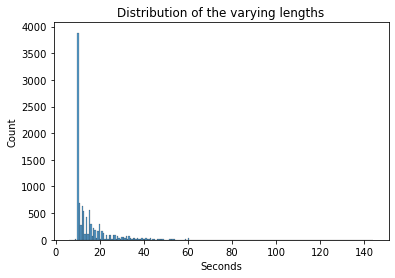

INCART Database
The sample frequency of ECGs is 257 Hz
The total number of different lengths is 1
- length: 1800.0 - 74 pcs
The length doesn't vary but remains the same 1800.0
PTB and PTB-XL Database
The sample frequency of ECGs is 500-1000 Hz
The total number of different lengths is 12
- length: 10.0 - 21838 pcs
- length: 115.2 - 359 pcs
- length: 120.012 - 113 pcs
- length: 38.4 - 32 pcs
- length: 115.174 - 3 pcs
- length: 32.0 - 3 pcs
- length: 87.91 - 1 pcs
- length: 96.588 - 1 pcs
- length: 76.8 - 1 pcs
- length: 91.987 - 1 pcs
The length varies from 10.0 to 120.012


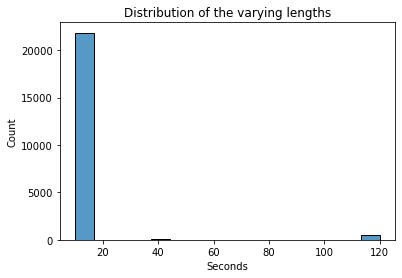

G12EC Database
The sample frequency of ECGs is 500 Hz
The total number of different lengths is 2
- length: 10.0 - 10292 pcs
- length: 5.0 - 52 pcs
The length varies from 5.0 to 10.0


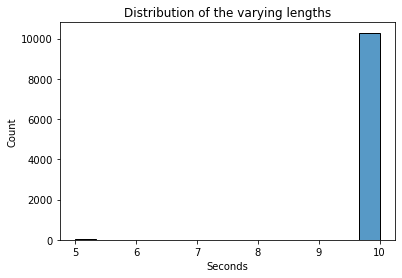

Chapman-Shaoxing and Ningbo Database
The sample frequency of ECGs is 500 Hz
The total number of different lengths is 1
- length: 10.0 - 45151 pcs
The length doesn't vary but remains the same 10.0


In [23]:
#############################################
# CPSC (A) and CPSC-Extra(Q): 6-144 s, 500 Hz
# INCART(I): 30 mins, 257 Hz
# PTB(S): 1000 Hz
# PTB-XL(HR): 10 s, 500 Hz
# G12EC(E): 5-10 s, 500 Hz
# Chapman-Shaoxing and Ningbo (JS): 10 s, 500 Hz
#############################################
# Let's dig into more details of ECGs
# Recordings have 12 rows if they are 12-lead ECG recordings
source_names = "CPSC-&-CPSC-Extra INCART PTB-&-PTB-XL G12EC Chapman-Shaoxing-&-Ningbo".split(" ")
hzs = "500 257 500-1000 500 500".split(" ")

# NB! All training data from 12 leads so no other combinations considered
for i, source in enumerate(sources):
    max_times = list()
    for j in range(len(source)):
        header, recording = source[j]
        src_fs = np.int64(header[0].split(" ")[2])
        audio_len = recording.shape[1]
        src_time = 1.0 * np.linspace(0, audio_len, audio_len) / src_fs
        
        max_times.append(src_time[-1])
    
    if "-&-" in source_names[i]:
        names = source_names[i].replace("-&-", " and ")
        print(color.BOLD + color.UNDERLINE + color.PURPLE + f"{names} Database" + color.END)
    else:
        print(color.BOLD + color.UNDERLINE + color.PURPLE + f"{source_names[i]} Database" + color.END)
    
    print(f"The sample frequency of ECGs is {hzs[i]} Hz")
    time_counter = Counter(max_times)
    print(f"The total number of different lengths is {len(time_counter)}")
    for key, item in time_counter.most_common(10): print(f"- length: {key} - {item} pcs")
    
    if min(max_times) == max(max_times):
        print(f"The length doesn't vary but remains the same {min(max_times)}")
    else:
        print(f"The length varies from {min(max_times)} to {max(max_times)}")
        # Let's see the distribution of different lenghts
        sns.histplot(max_times).set(title="Distribution of the varying lengths", xlabel = "Seconds");
        plt.show()